# Wine Quality Analysis

This notebook will serve as a comprehensive document for the **Wine Quality Analysis** project I am working on. It includes an organized structure for observations, code snippets, visualizations, and key findings.

## 1. Exploratory Data Analysis

### 1.1 Imports

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from my_utils import (
    remove_highly_correlated_features,
    train_and_evaluate_model,
    plot_feature_importance,
    identify_outliers
)
from my_utils.exploratory_analysis import DataExplorer

In [2]:
sns.set_context('poster')

In [3]:
filepath_red = '/Users/cdcoonce/Documents/GitHub/Practice_Data_Sets/Wine Quality/Dataset/winequality_red.csv'
wine_data_red = pd.read_csv(filepath_red, sep=';')

filepath_white = '/Users/cdcoonce/Documents/GitHub/Practice_Data_Sets/Wine Quality/Dataset/winequality_white.csv'
wine_data_white = pd.read_csv(filepath_white, sep=';')

### 1.2 Checking Data Frames

#### 1.2.1 Data Types

In [4]:
print(wine_data_red.dtypes)
print(wine_data_white.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


#### 1.2.2 Checking Dataframe Structure

In [5]:
wine_data_red.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
wine_data_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

#### 1.2.3 Checking For Nulls

In [7]:
print(wine_data_red.isnull().sum())
print(wine_data_white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### 1.3.1 Descriptive Statistics

In [8]:
wine_data_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
wine_data_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

#### 1.3.2 Feature Distributions

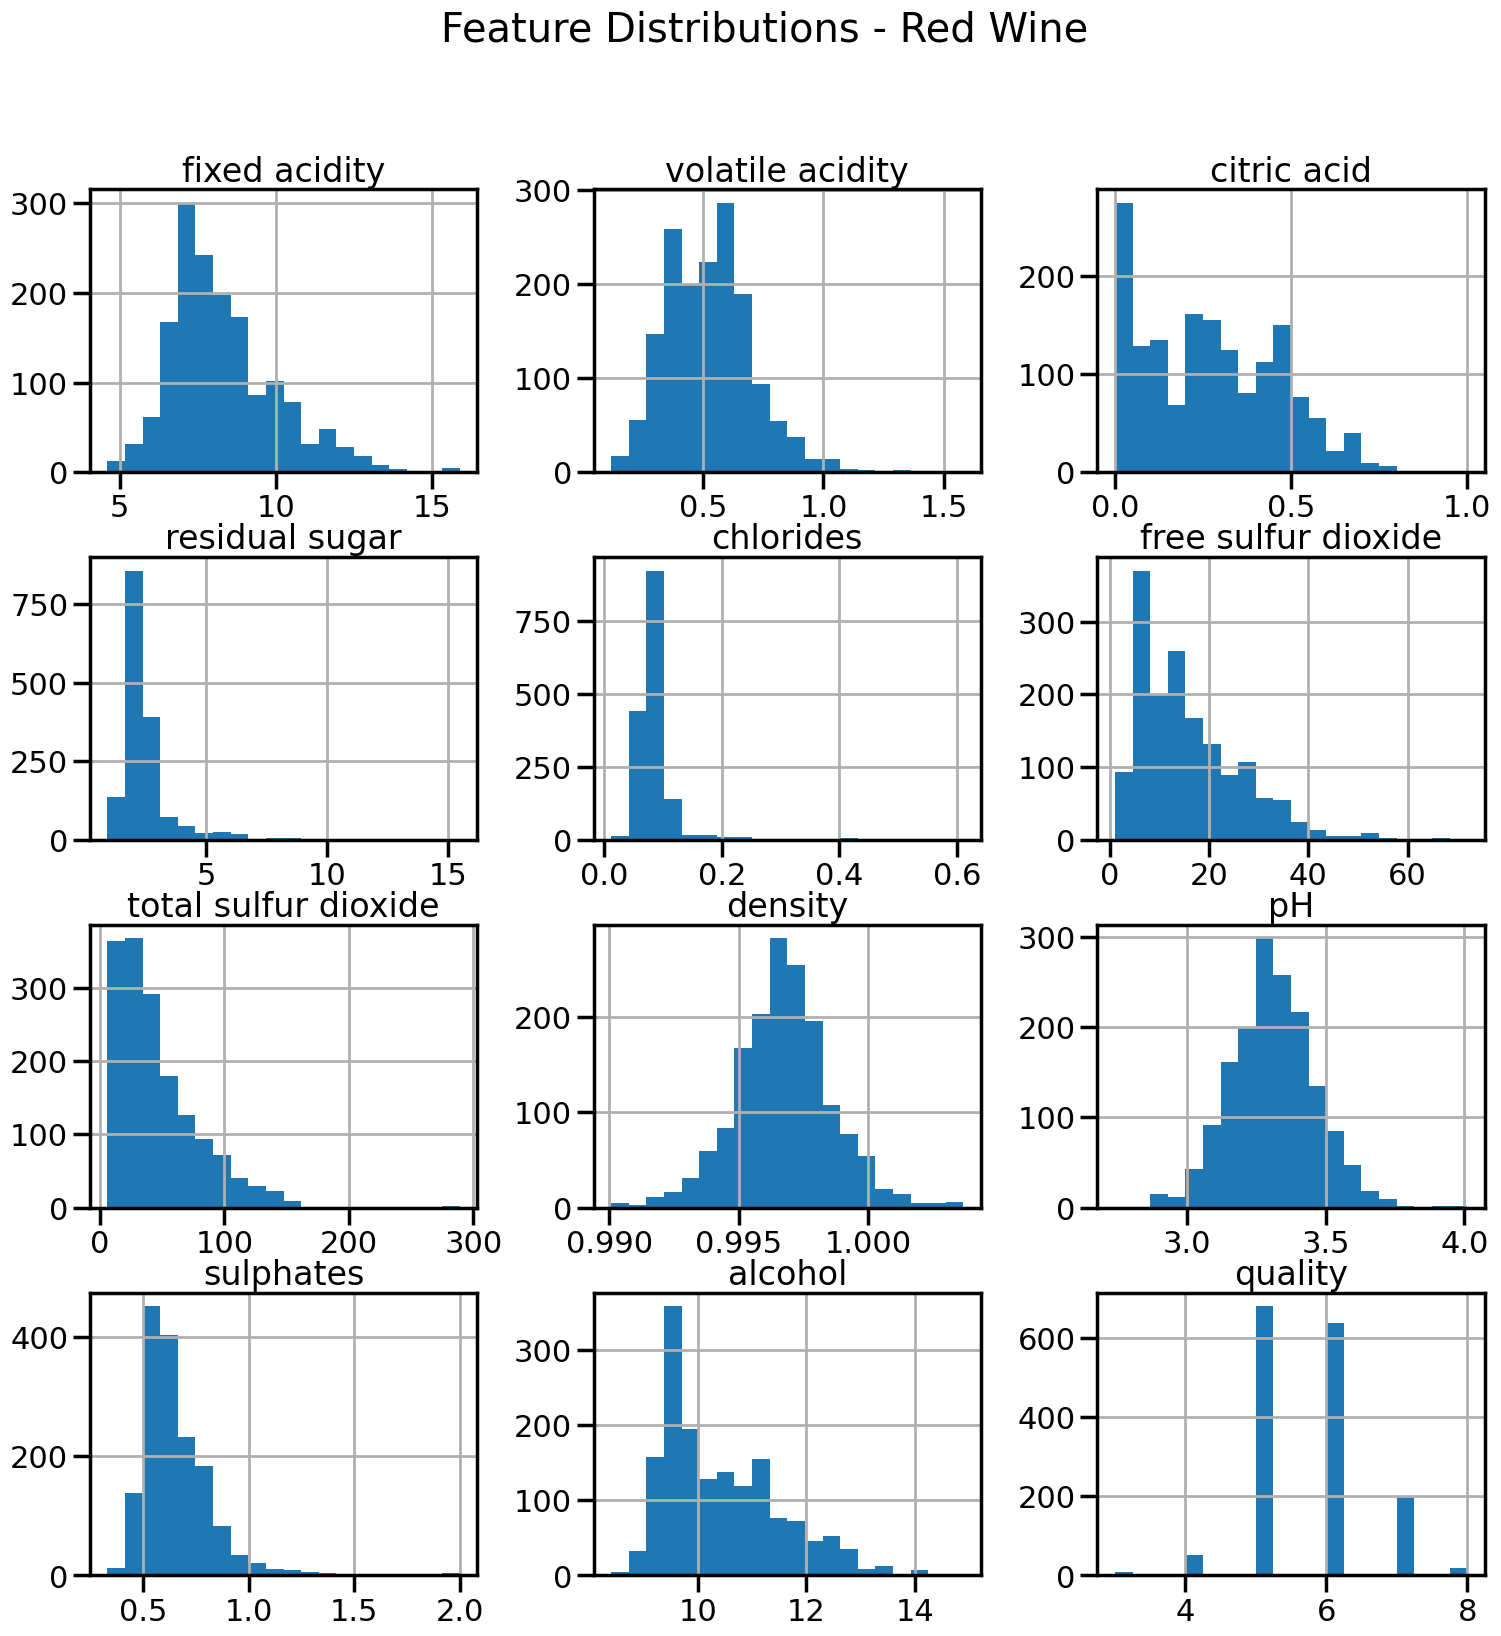

In [10]:
wine_data_red.hist(figsize=(18,18), bins=20)
plt.suptitle("Feature Distributions - Red Wine")
plt.show()

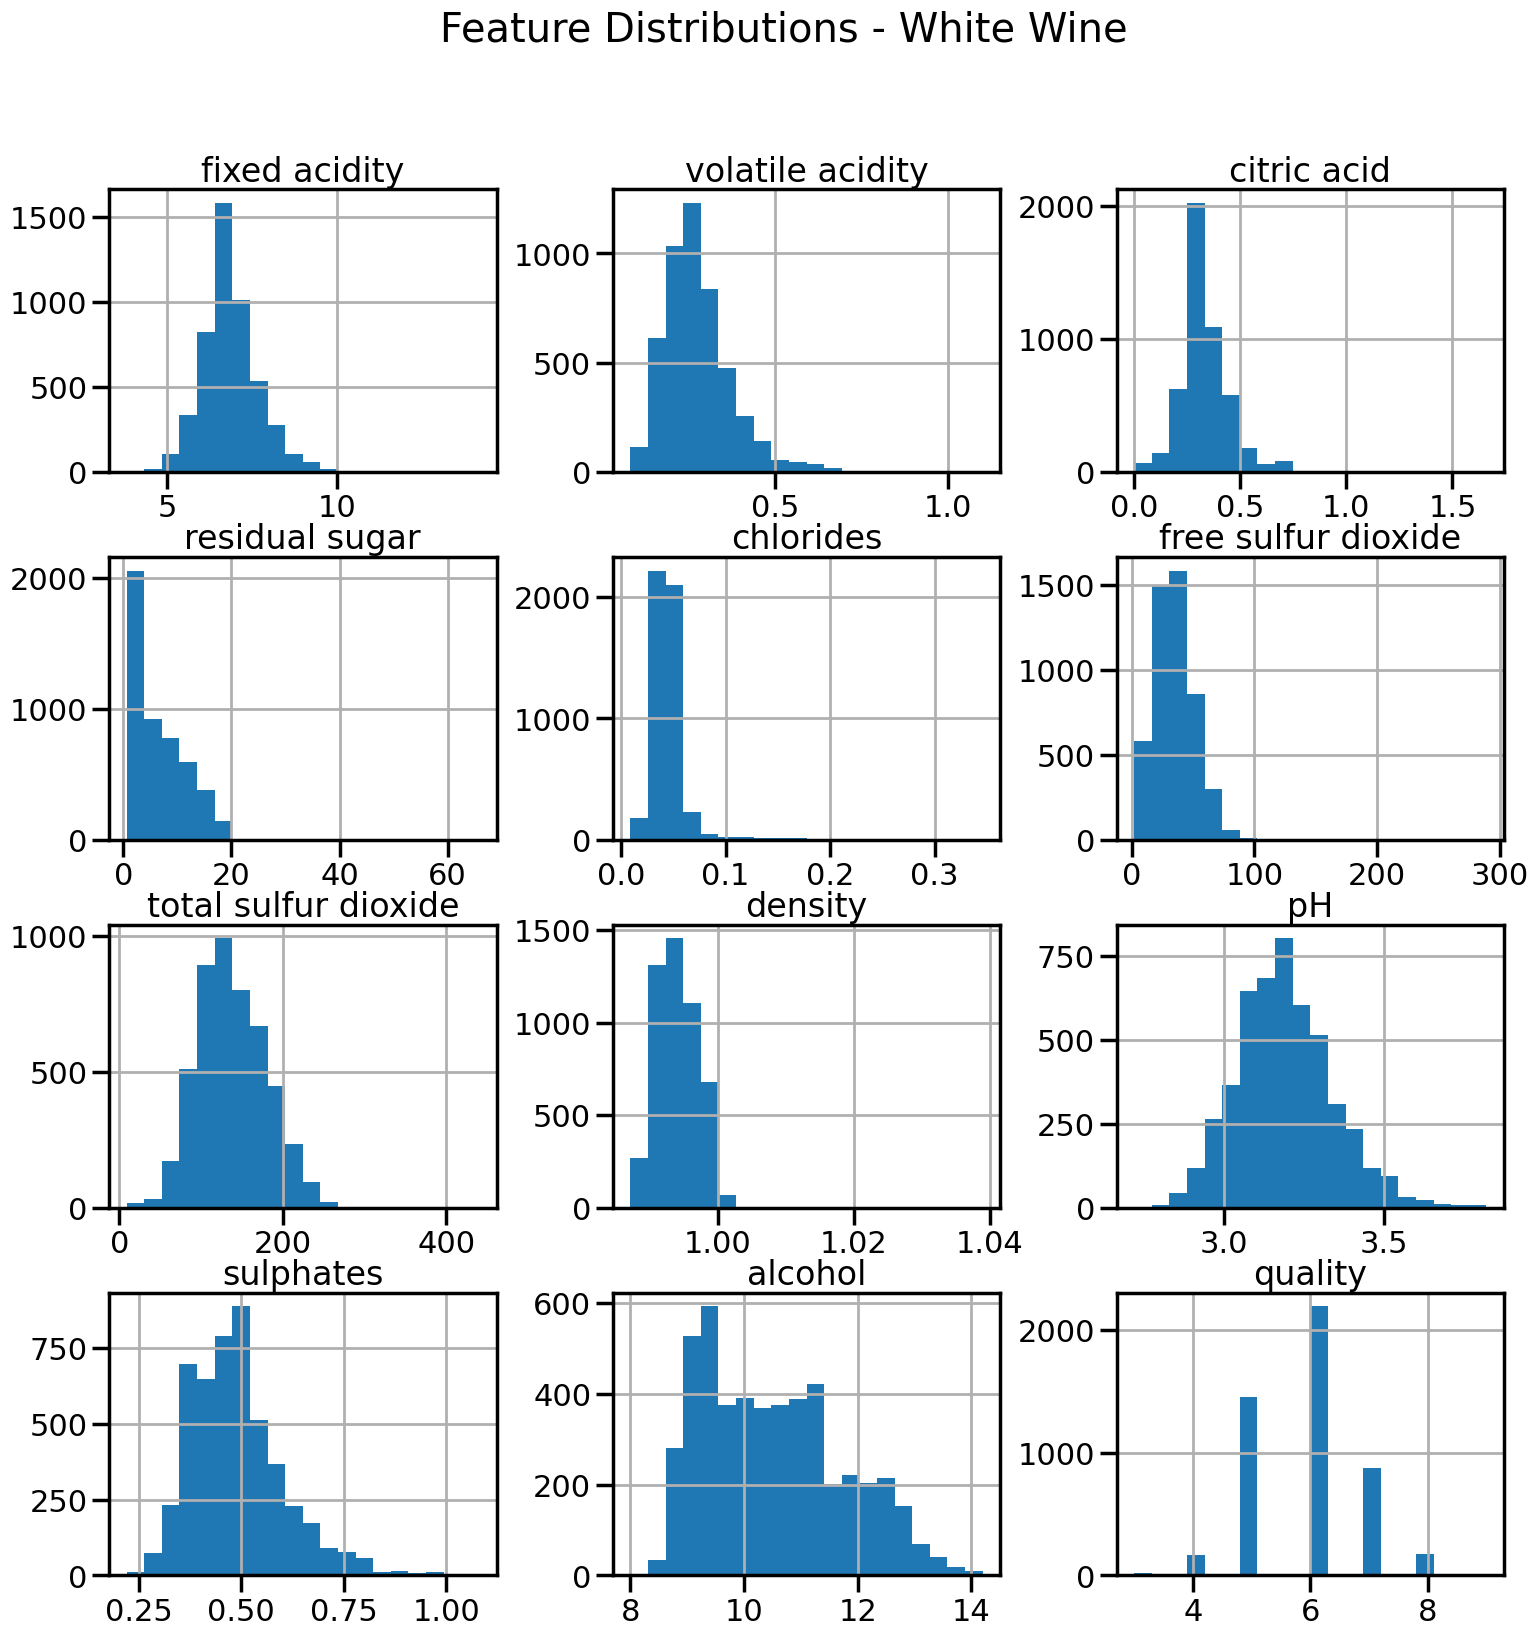

In [11]:
wine_data_white.hist(figsize=(18,18), bins=20)
plt.suptitle("Feature Distributions - White Wine")
plt.show()

#### 1.3.4 Pairplots

In [12]:
key_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'density', 'alcohol', 
                'quality']

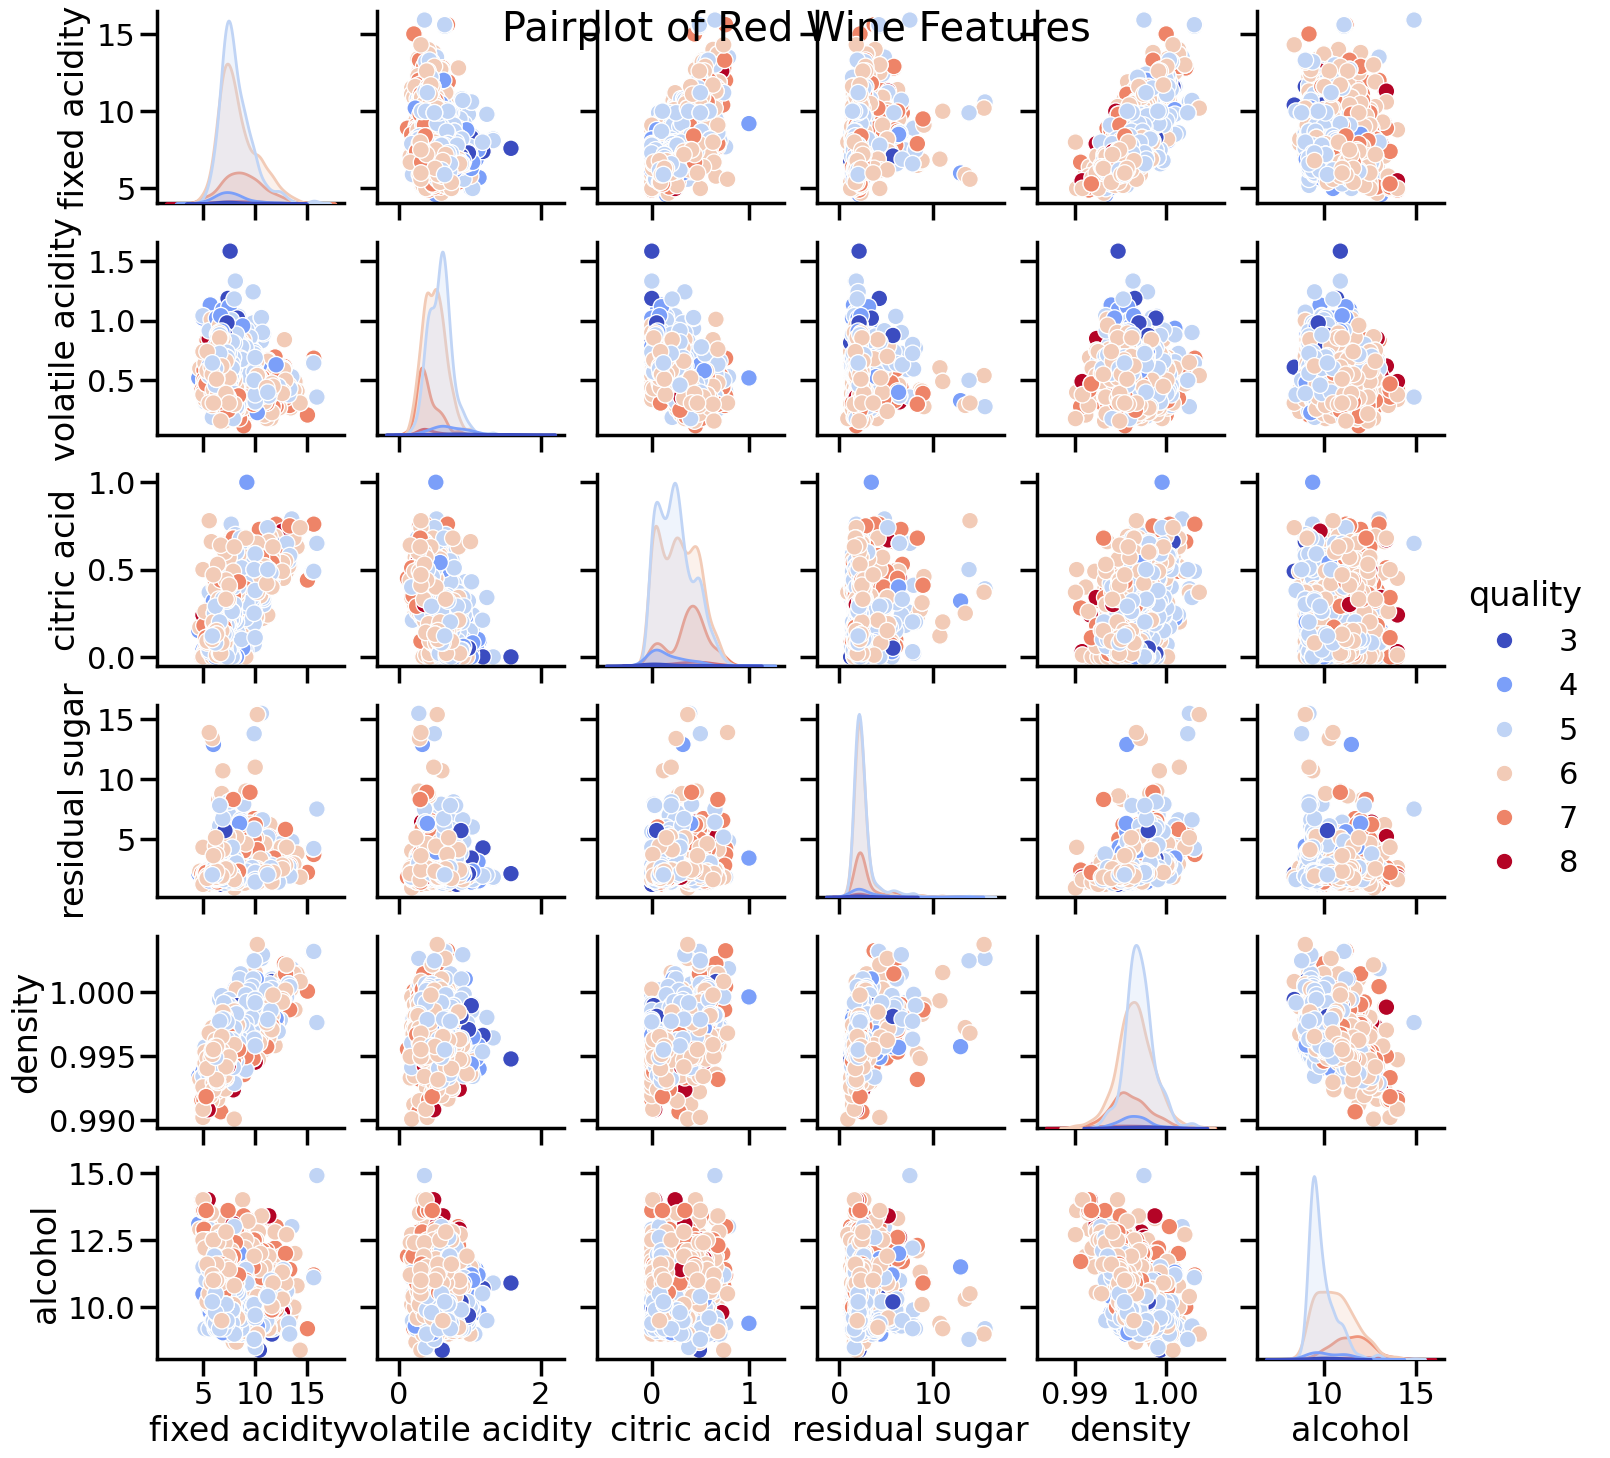

In [13]:
sns.pairplot(wine_data_red[key_features], hue='quality', palette='coolwarm')
plt.suptitle("Pairplot of Red Wine Features")
plt.show()

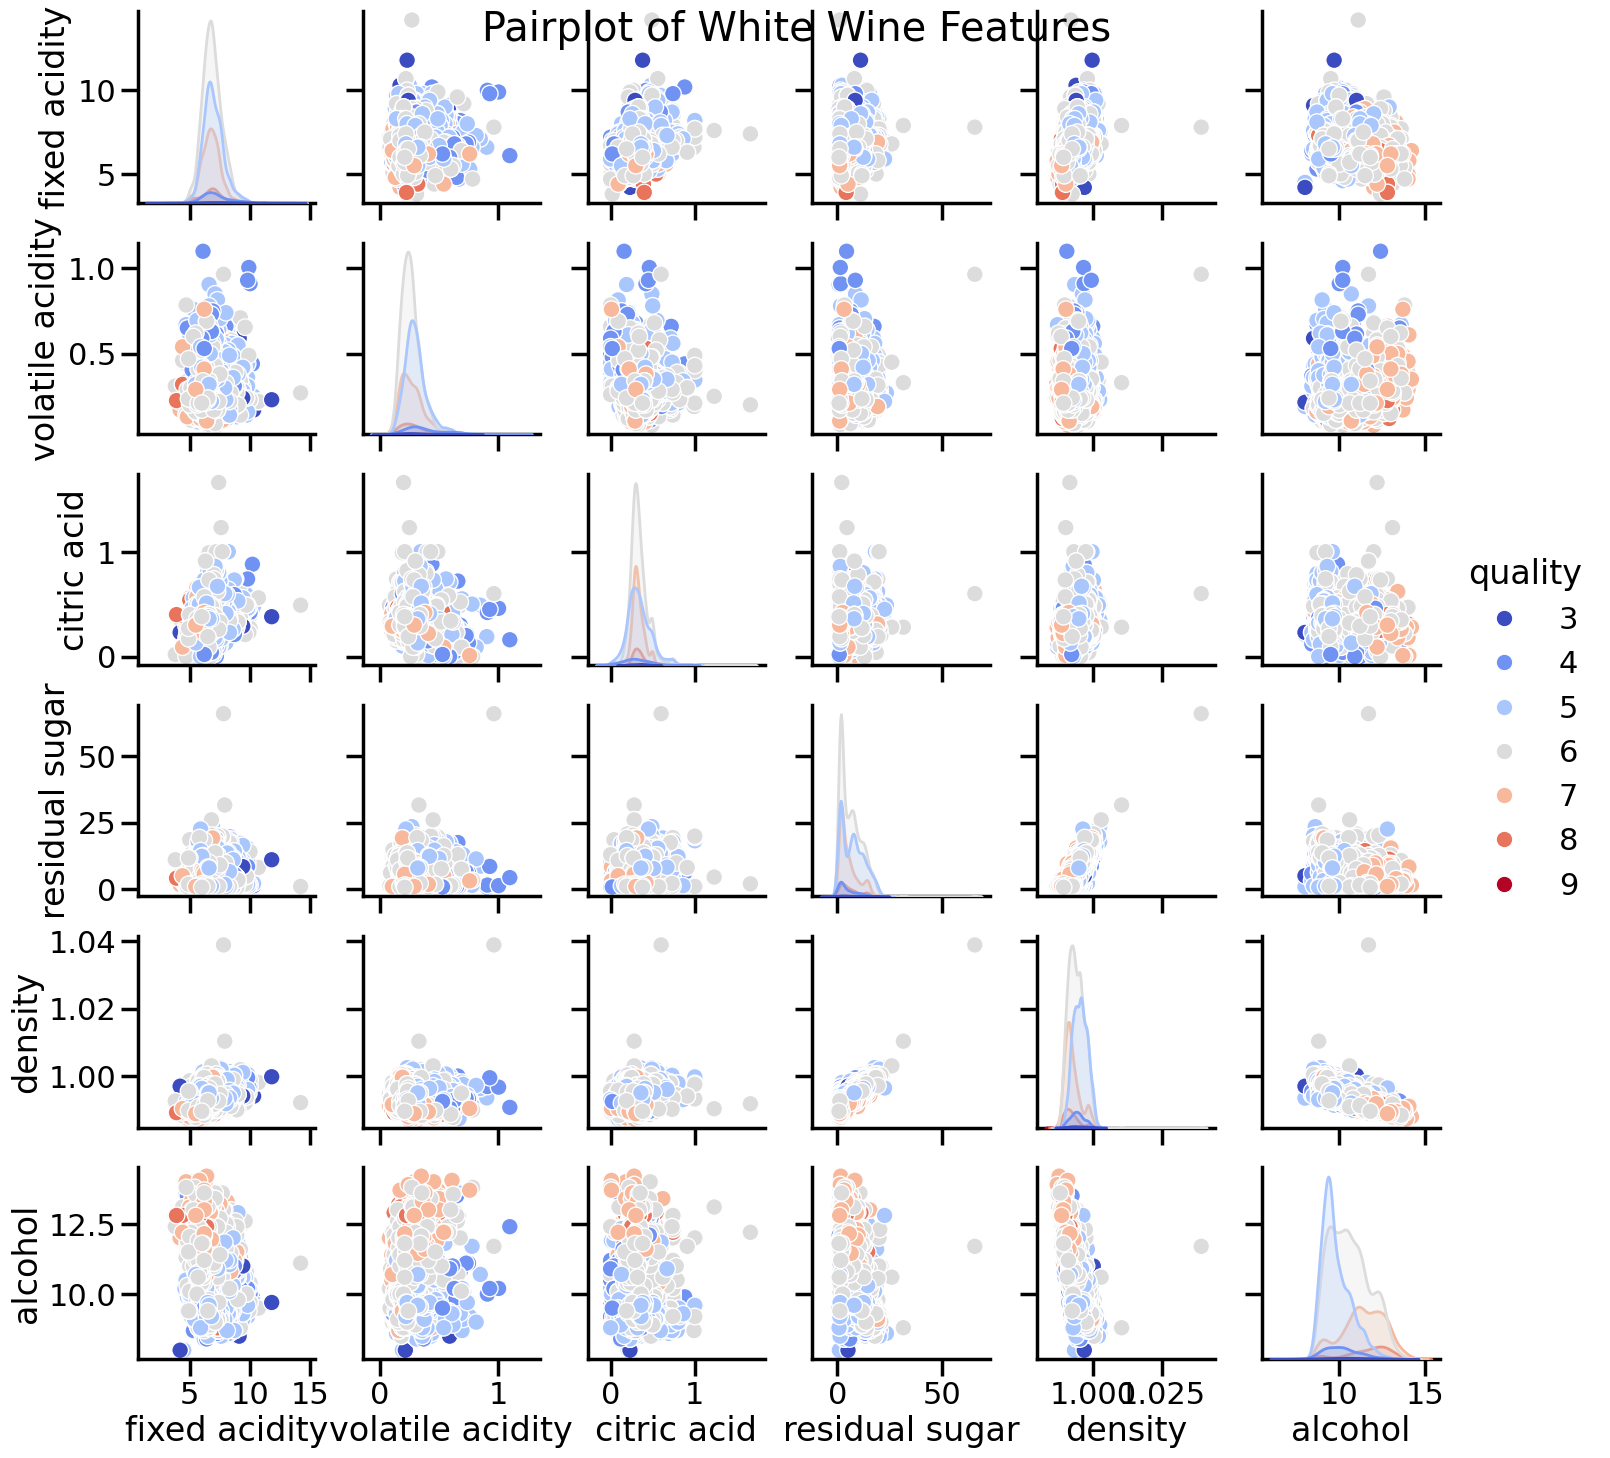

In [14]:
sns.pairplot(wine_data_white[key_features], hue='quality', palette='coolwarm')
plt.suptitle("Pairplot of White Wine Features")
plt.show()

#### 1.3.5 correllation matrix

##### Full Feature

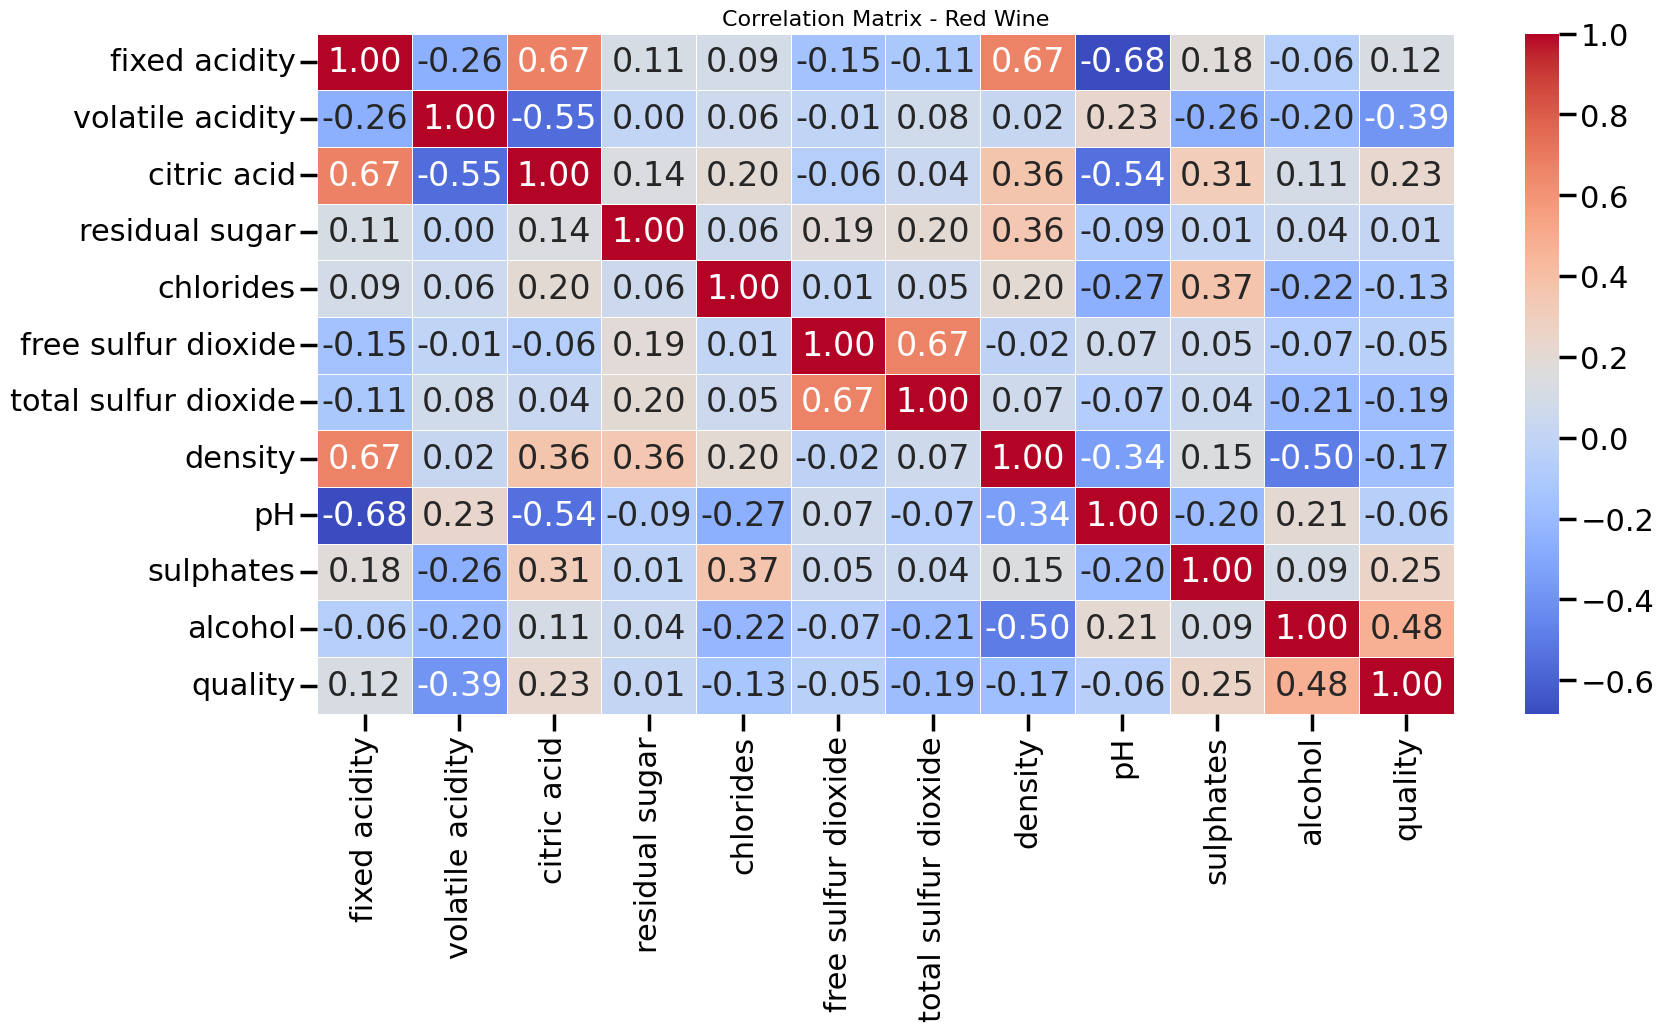

In [15]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,1)
sns.heatmap(wine_data_red.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix - Red Wine", fontsize='16')

plt.tight_layout()
plt.show()

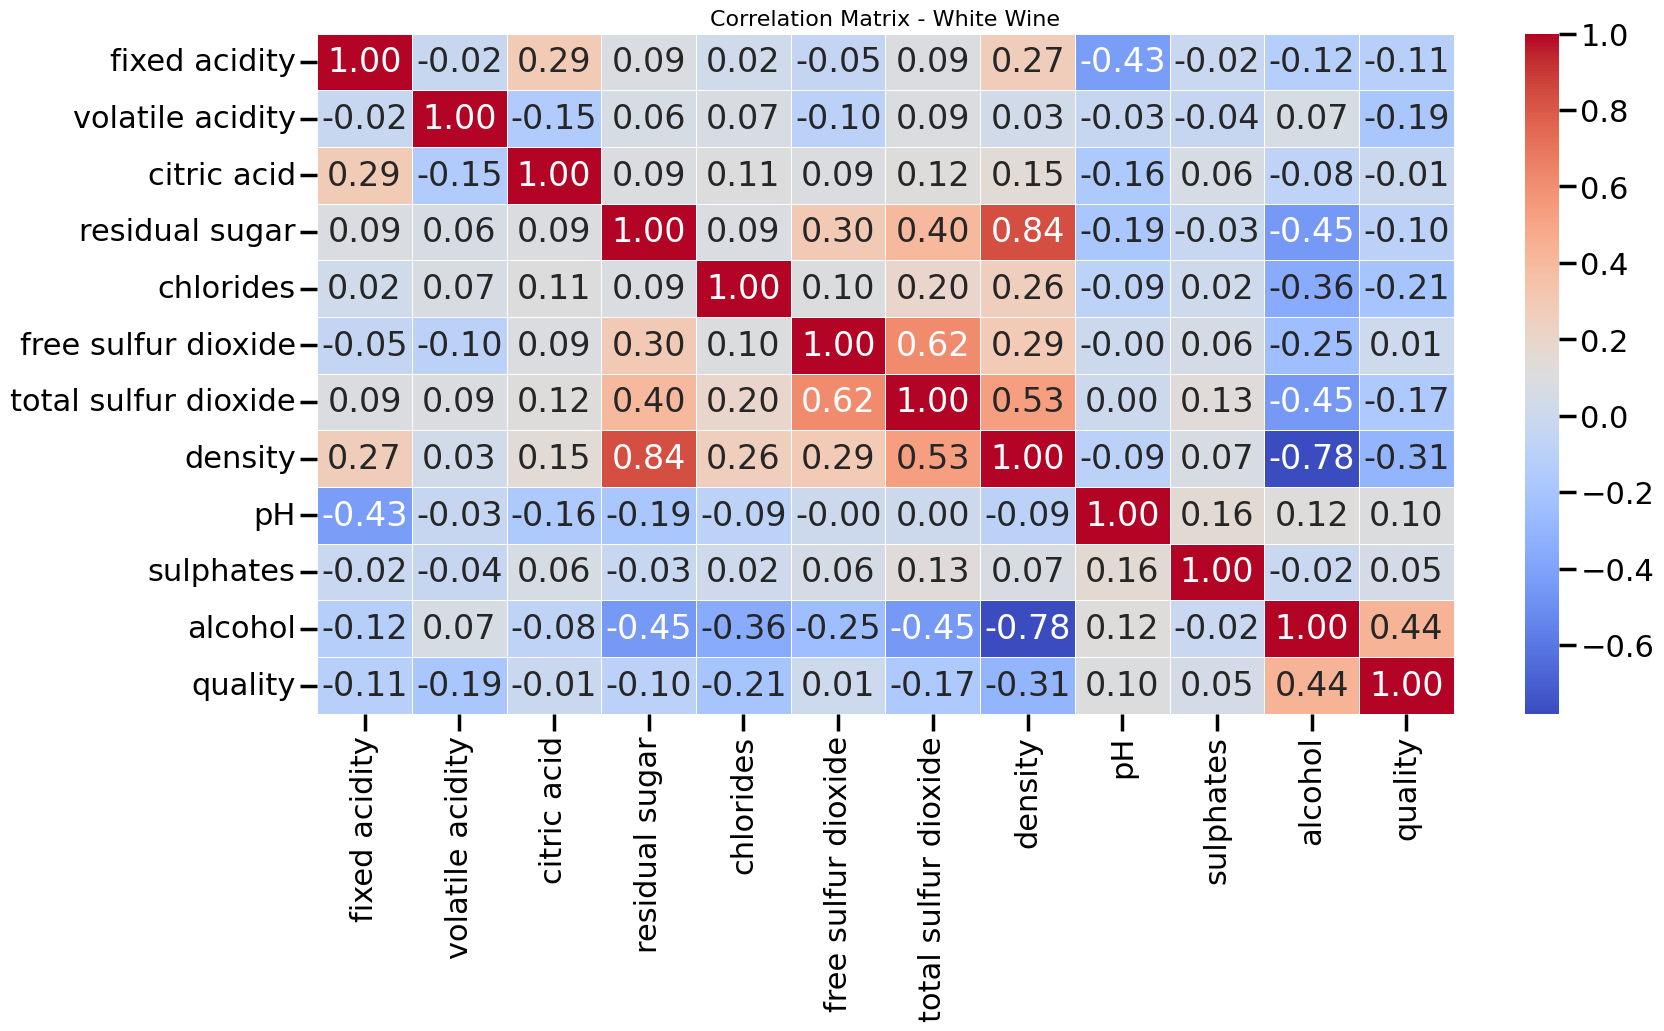

In [16]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,2)
sns.heatmap(wine_data_white.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix - White Wine", fontsize='16')

plt.tight_layout()
plt.show()

##### Reduced Features

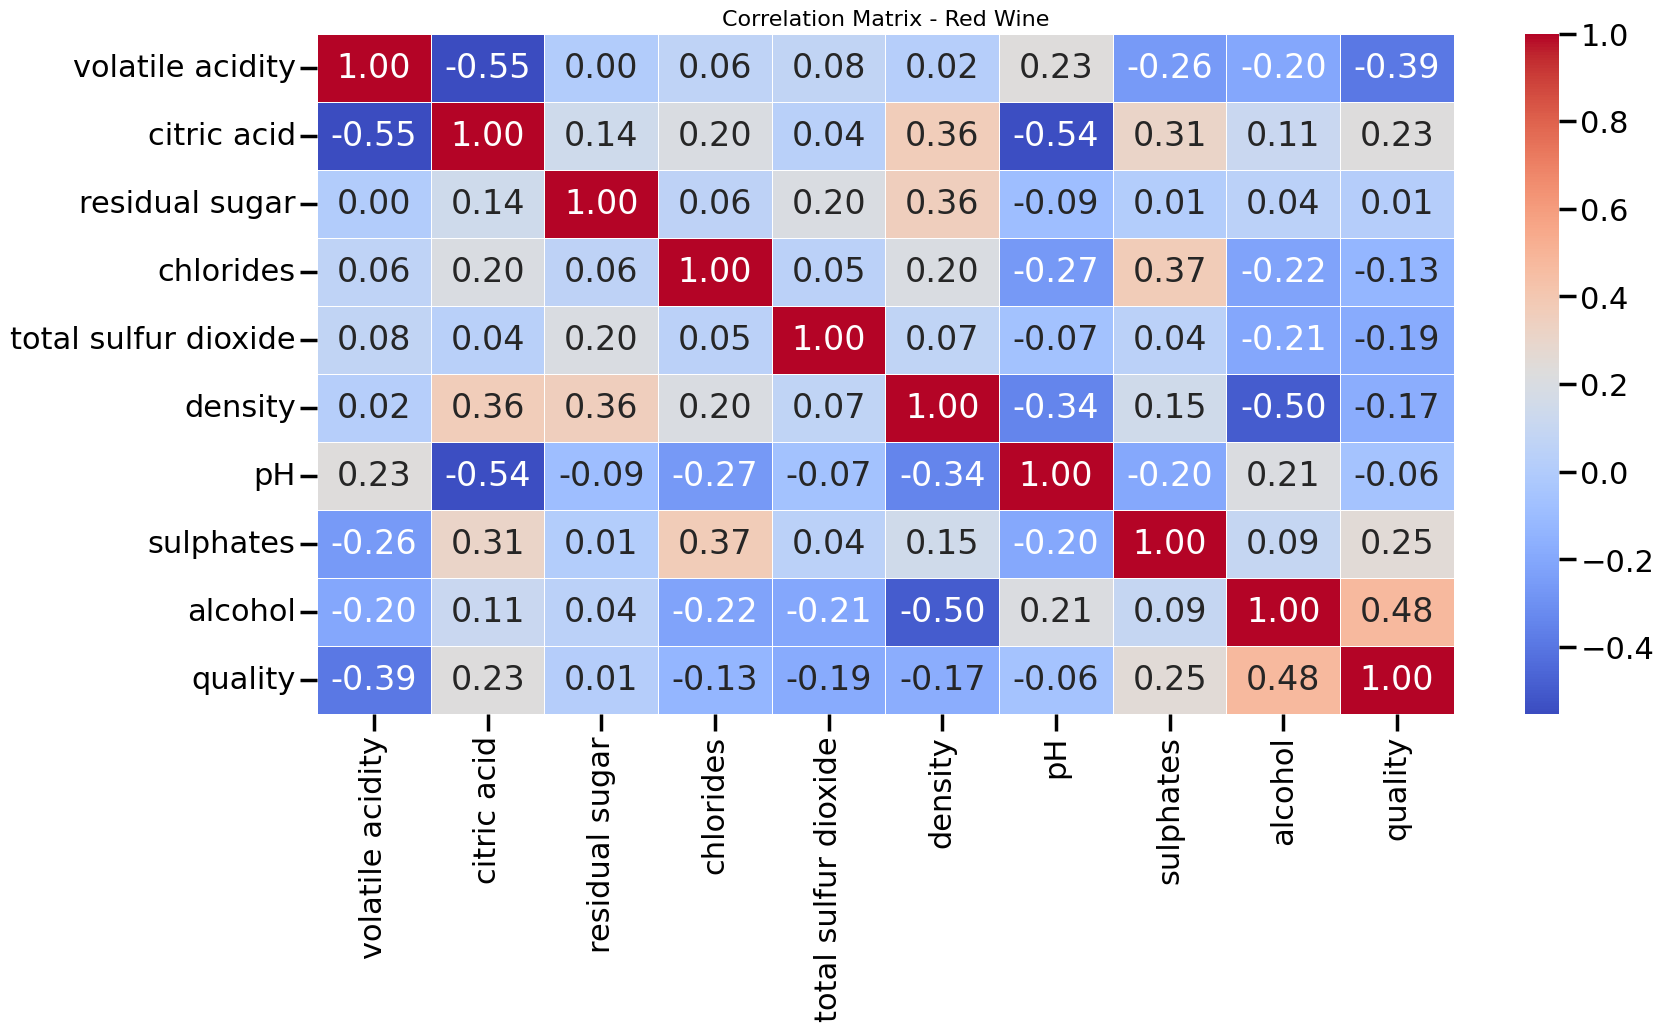

In [71]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,1)
sns.heatmap(reduced_red_wine.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix - Red Wine", fontsize='16')

plt.tight_layout()
plt.show()

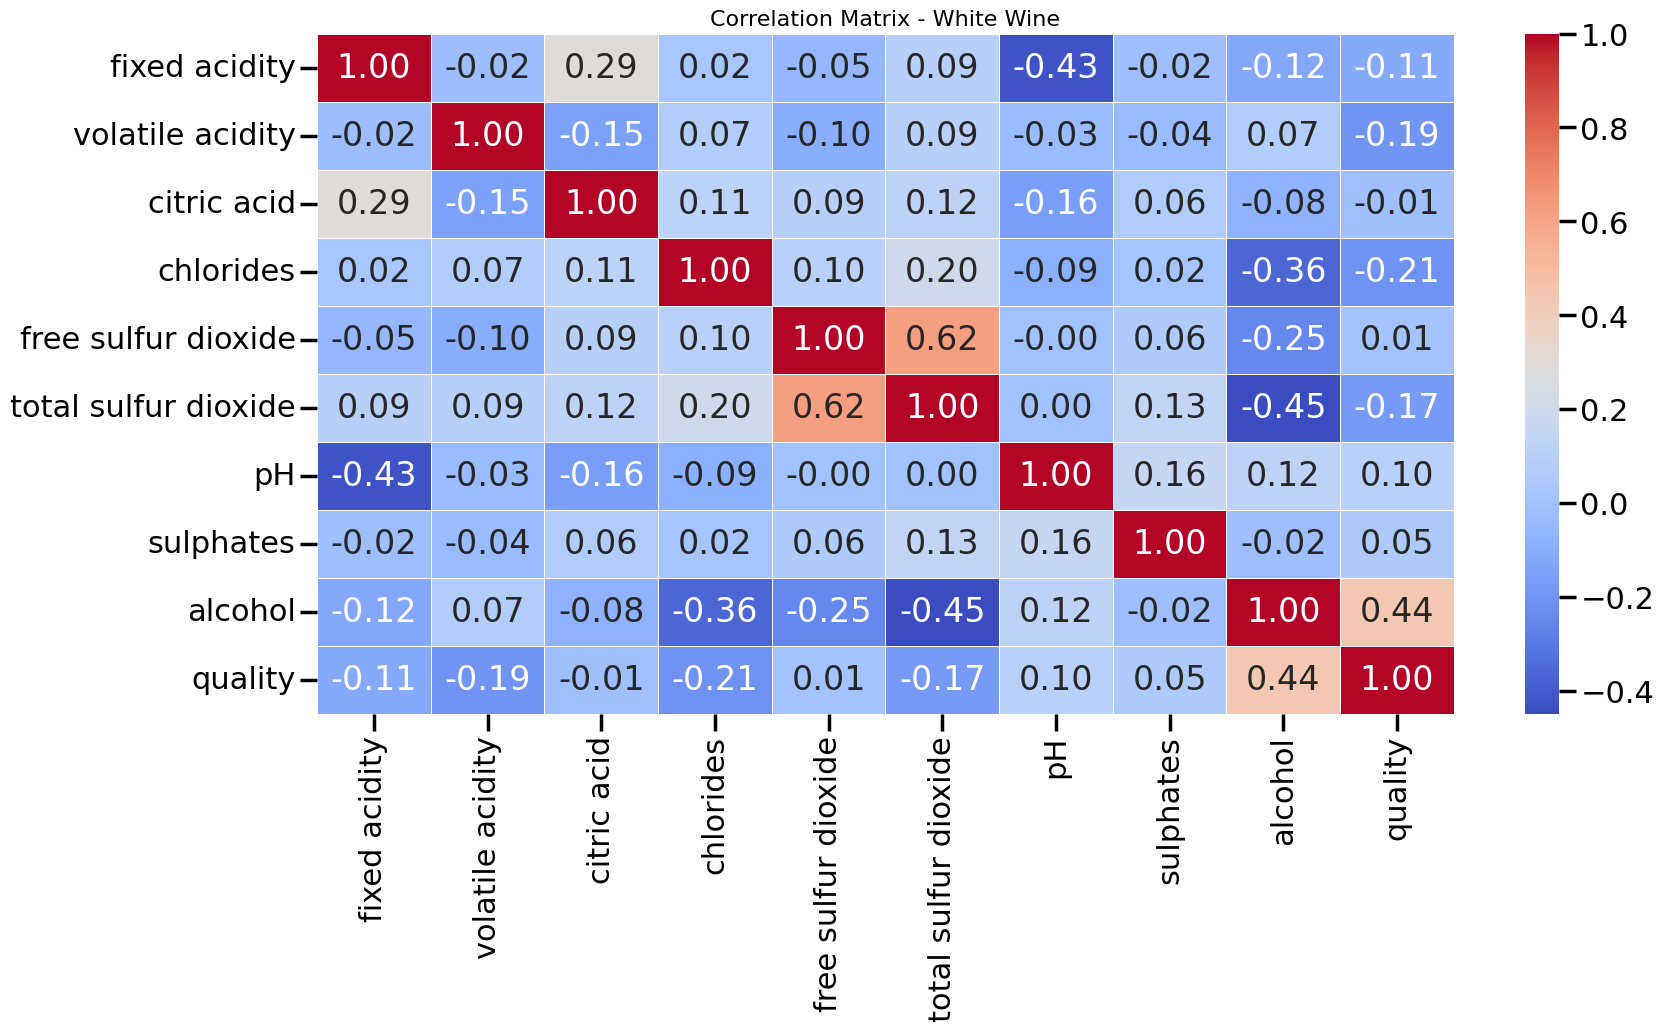

In [72]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,2)
sns.heatmap(reduced_white_wine.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix - White Wine", fontsize='16')

plt.tight_layout()
plt.show()

##### Second Reduction of Features

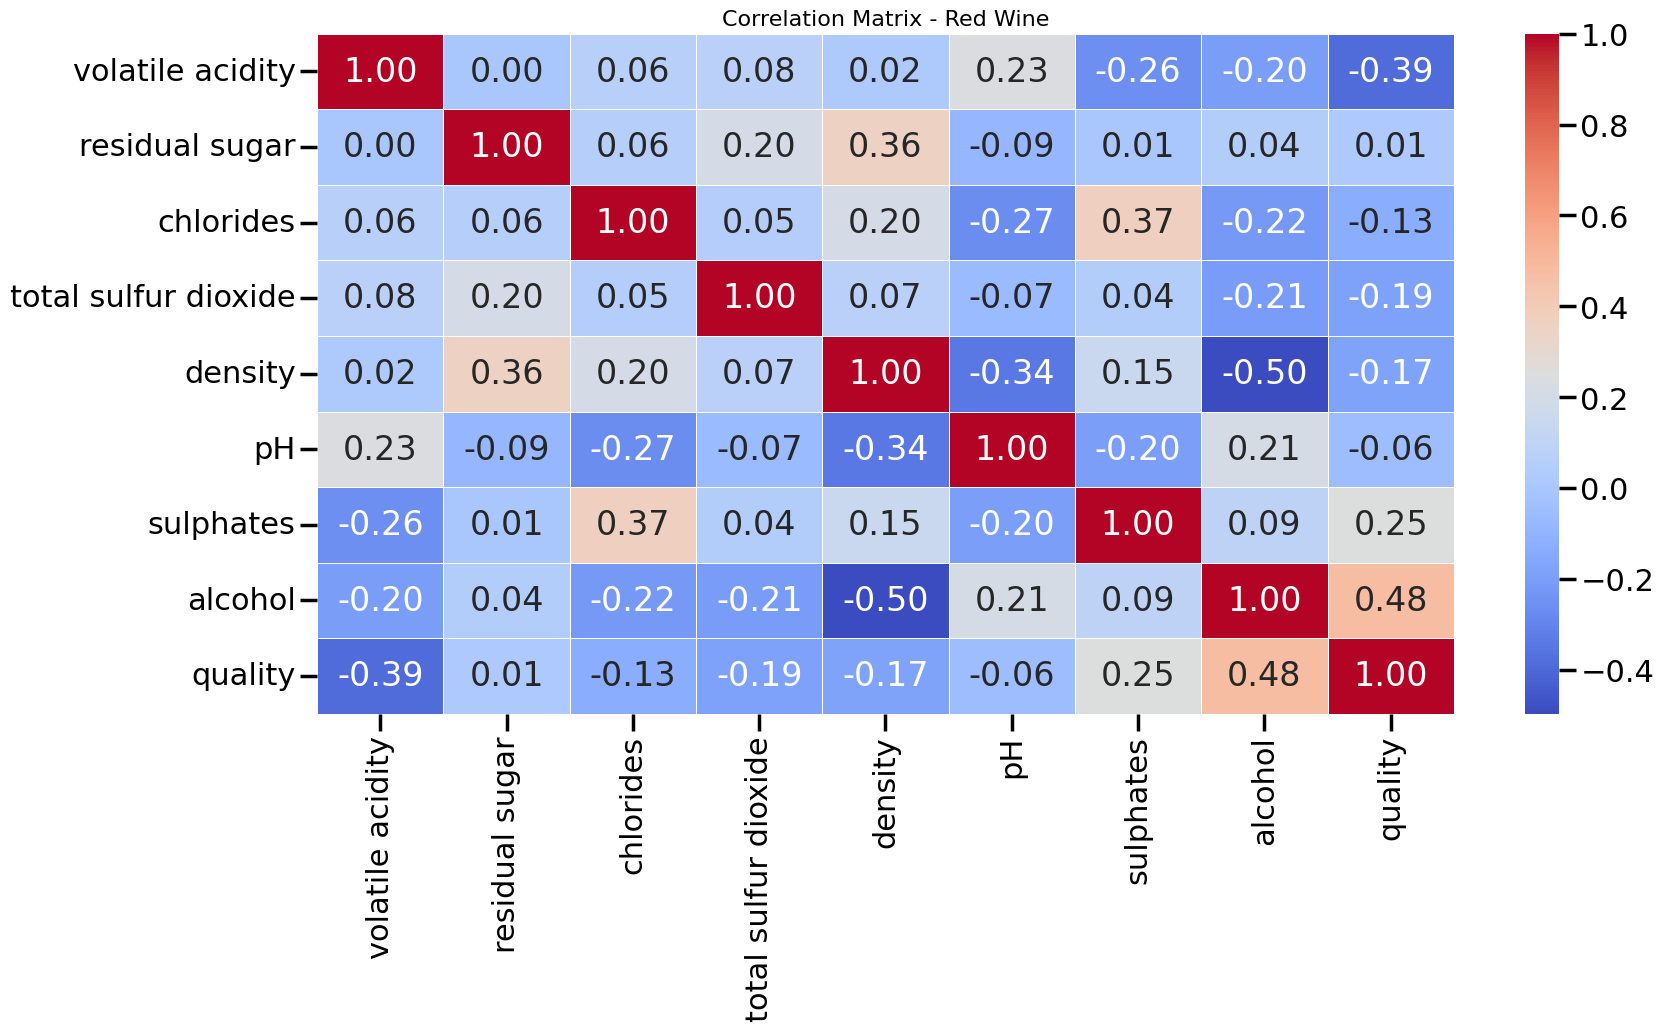

In [75]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,1)
sns.heatmap(reduced_red_wine_third.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix - Red Wine", fontsize='16')

plt.tight_layout()
plt.show()

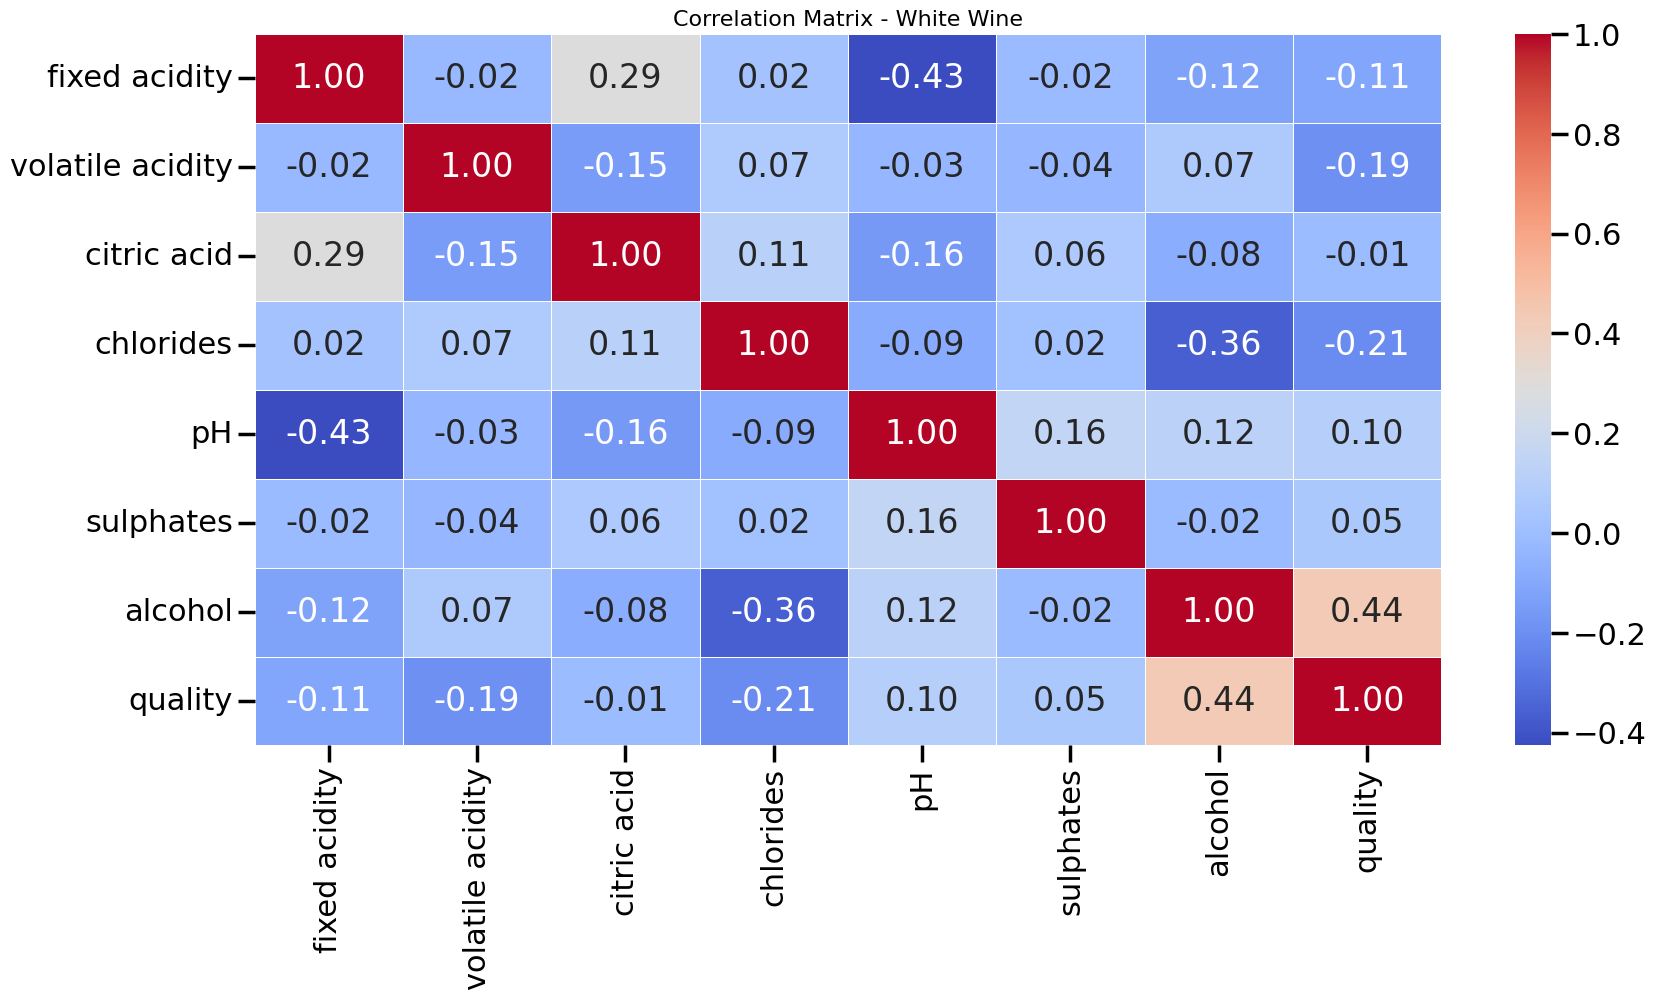

In [76]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,2)
sns.heatmap(reduced_white_wine_third.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix - White Wine", fontsize='16')

plt.tight_layout()
plt.show()

### 1.4 Preprocessing

#### 1.4.1 Removing Highly Correllated Features

##### First Reduction

In [70]:
target_column = 'quality'
reduced_red_wine, removed_red_features = remove_highly_correlated_features(wine_data_red, target_column)
print("Removed Features for Red Wine:", removed_red_features)

Removed Features for Red Wine: ['fixed acidity', 'free sulfur dioxide']


In [18]:
reduced_white_wine, removed_white_features = remove_highly_correlated_features(wine_data_white, target_column)
print("Removed Features for White Wine:", removed_white_features)

Removed Features for White Wine: ['density', 'residual sugar']


##### Second Reduction

In [73]:
target_column = 'quality'
reduced_red_wine_second, removed_red_features = remove_highly_correlated_features(reduced_red_wine, target_column, threshold=.5)
print("Removed Features for Red Wine:", removed_red_features)

Removed Features for Red Wine: ['citric acid']


In [82]:
reduced_white_wine_second, removed_white_features = remove_highly_correlated_features(reduced_white_wine, target_column, threshold=.5)
print("Removed Features for White Wine:", removed_white_features)

Removed Features for White Wine: ['free sulfur dioxide']


##### Third Reduction

In [88]:
target_column = 'quality'
reduced_red_wine_third, removed_red_features = remove_highly_correlated_features(reduced_red_wine_second, target_column, threshold=.4)
print("Removed Features for Red Wine:", removed_red_features)

Removed Features for Red Wine: ['density', 'alcohol']


In [89]:
reduced_white_wine_third, removed_white_features = remove_highly_correlated_features(reduced_white_wine_second, target_column, threshold=.4)
print("Removed Features for White Wine:", removed_white_features)

Removed Features for White Wine: ['pH', 'total sulfur dioxide', 'alcohol']


#### 1.4.2 Train-Test Splits

##### Full Feature Splits

In [19]:
X_red = wine_data_red.drop('quality', axis=1)
y_red = wine_data_red['quality']

X_white = wine_data_white.drop('quality', axis=1)
y_white = wine_data_white['quality']

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(
    X_red, y_red, test_size=0.2, random_state=42
)

X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(
    X_white, y_white, test_size=0.2, random_state=42
)

print(f"Red Wine Train Shape: {X_red_train.shape}, Test Shape: {X_red_test.shape}")
print(f"White Wine Train Shape: {X_white_train.shape}, Test Shape: {X_white_test.shape}")

Red Wine Train Shape: (1279, 11), Test Shape: (320, 11)
White Wine Train Shape: (3918, 11), Test Shape: (980, 11)


##### High Correlation Reduced Feature Splits

In [20]:
X_red_reduced = reduced_red_wine.drop('quality', axis=1)
y_red_reduced = reduced_red_wine['quality']

X_white_reduced = reduced_white_wine.drop('quality', axis=1)
y_white_reduced = reduced_white_wine['quality']

X_red_reduced_train, X_red_reduced_test, y_red_reduced_train, y_red_reduced_test = train_test_split(
    X_red_reduced, y_red_reduced, test_size=0.2, random_state=42
)

X_white_reduced_train, X_white_reduced_test, y_white_reduced_train, y_white_reduced_test = train_test_split(
    X_white_reduced, y_white_reduced, test_size=0.2, random_state=42
)

print(f"Red Wine Train Shape: {X_red_reduced_train.shape}, Test Shape: {X_red_reduced_test.shape}")
print(f"White Wine Train Shape: {X_white_reduced_train.shape}, Test Shape: {X_white_reduced_test.shape}")

Red Wine Train Shape: (1279, 9), Test Shape: (320, 9)
White Wine Train Shape: (3918, 9), Test Shape: (980, 9)


##### Second reduction Splits

In [83]:
X_red_reduced_second = reduced_red_wine_second.drop('quality', axis=1)
y_red_reduced_second = reduced_red_wine_second['quality']

X_white_reduced_second = reduced_white_wine_second.drop('quality', axis=1)
y_white_reduced_second = reduced_white_wine_second['quality']

X_red_reduced_train_second, X_red_reduced_test_second, y_red_reduced_train_second, y_red_reduced_test_second = train_test_split(
    X_red_reduced_second, y_red_reduced_second, test_size=0.2, random_state=42
)

X_white_reduced_train_second, X_white_reduced_test_second, y_white_reduced_train_second, y_white_reduced_test_second = train_test_split(
    X_white_reduced_second, y_white_reduced_second, test_size=0.2, random_state=42
)

print(f"Red Wine Train Shape: {X_red_reduced_train_second.shape}, Test Shape: {X_red_reduced_test_second.shape}")
print(f"White Wine Train Shape: {X_white_reduced_train_second.shape}, Test Shape: {X_white_reduced_test_second.shape}")

Red Wine Train Shape: (1279, 8), Test Shape: (320, 8)
White Wine Train Shape: (3918, 8), Test Shape: (980, 8)


##### Third Reduction Splits

In [90]:
X_red_reduced_third = reduced_red_wine_third.drop('quality', axis=1)
y_red_reduced_third = reduced_red_wine_third['quality']

X_white_reduced_third = reduced_white_wine_third.drop('quality', axis=1)
y_white_reduced_third = reduced_white_wine_third['quality']

X_red_reduced_train_third, X_red_reduced_test_third, y_red_reduced_train_third, y_red_reduced_test_third = train_test_split(
    X_red_reduced_third, y_red_reduced_third, test_size=0.2, random_state=42
)

X_white_reduced_train_third, X_white_reduced_test_third, y_white_reduced_train_third, y_white_reduced_test_third = train_test_split(
    X_white_reduced_third, y_white_reduced_third, test_size=0.2, random_state=42
)

print(f"Red Wine Train Shape: {X_red_reduced_train_third.shape}, Test Shape: {X_red_reduced_test_third.shape}")
print(f"White Wine Train Shape: {X_white_reduced_train_third.shape}, Test Shape: {X_white_reduced_test_third.shape}")

Red Wine Train Shape: (1279, 6), Test Shape: (320, 6)
White Wine Train Shape: (3918, 5), Test Shape: (980, 5)


#### 1.4.3 Feature Importance plotting

##### Full Feature Importance Plots

Feature Importance for Red Wine:


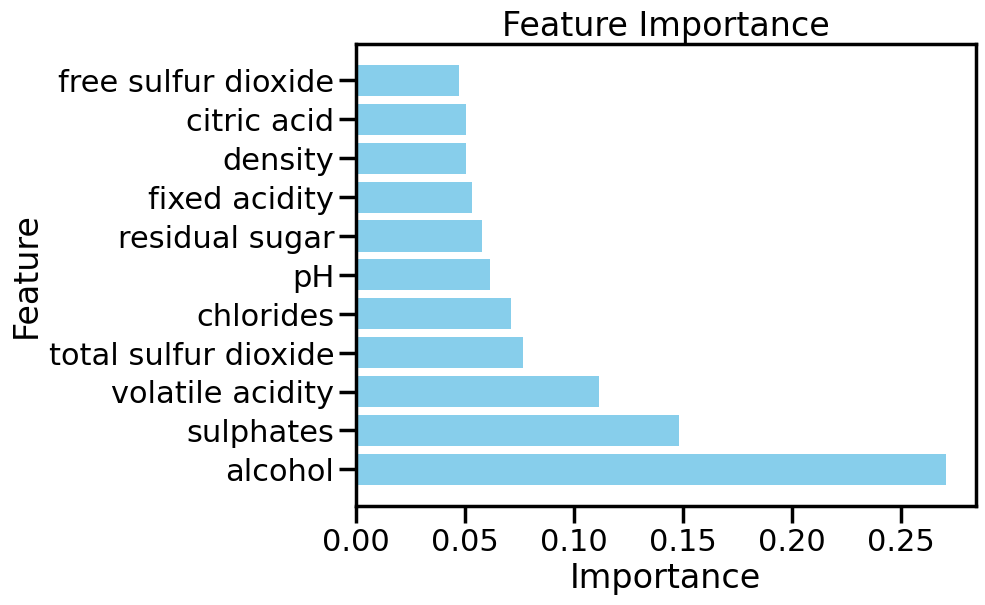

In [21]:
print("Feature Importance for Red Wine:")
red_importance = plot_feature_importance(X_red_train, y_red_train)

Feature Importance for White Wine:


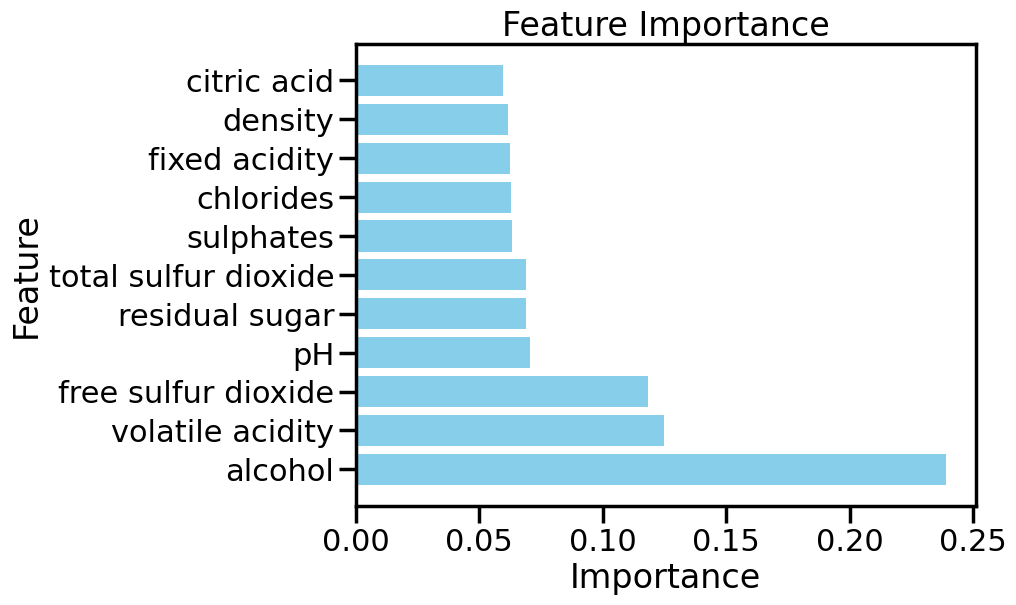

In [22]:
print("Feature Importance for White Wine:")
white_importance = plot_feature_importance(X_white_train, y_white_train)

##### Reduced Feature Importance Plots

Feature Importance for Red Wine:


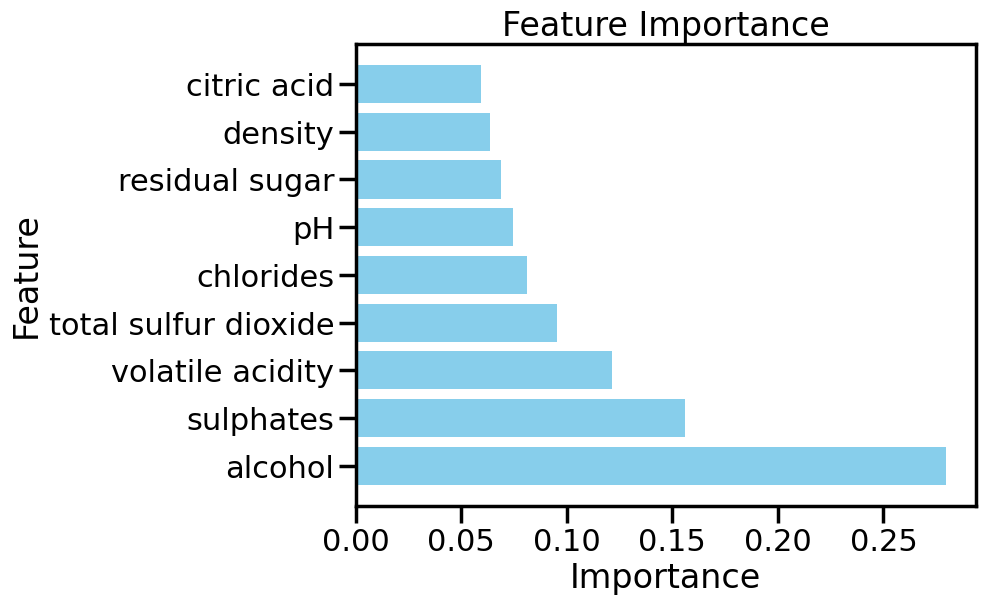

In [23]:
print("Feature Importance for Red Wine:")
red_reduced_importance = plot_feature_importance(X_red_reduced_train, y_red_reduced_train)

Feature Importance for White Wine:


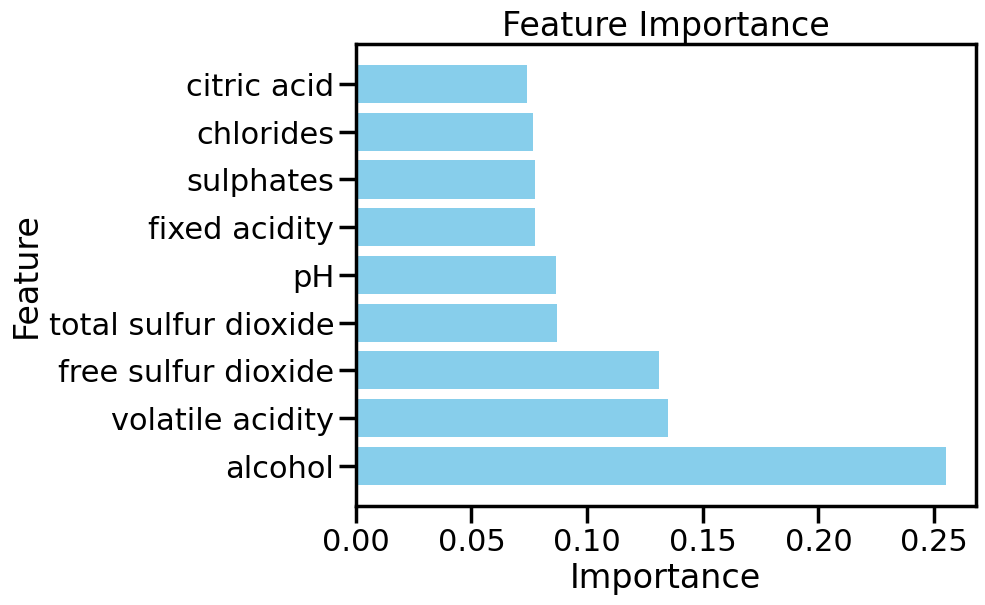

In [24]:
print("Feature Importance for White Wine:")
white_reduced_importance = plot_feature_importance(X_white_reduced_train, y_white_reduced_train)

##### Second Reduced Feature Importance Plots

Feature Importance for Red Wine:


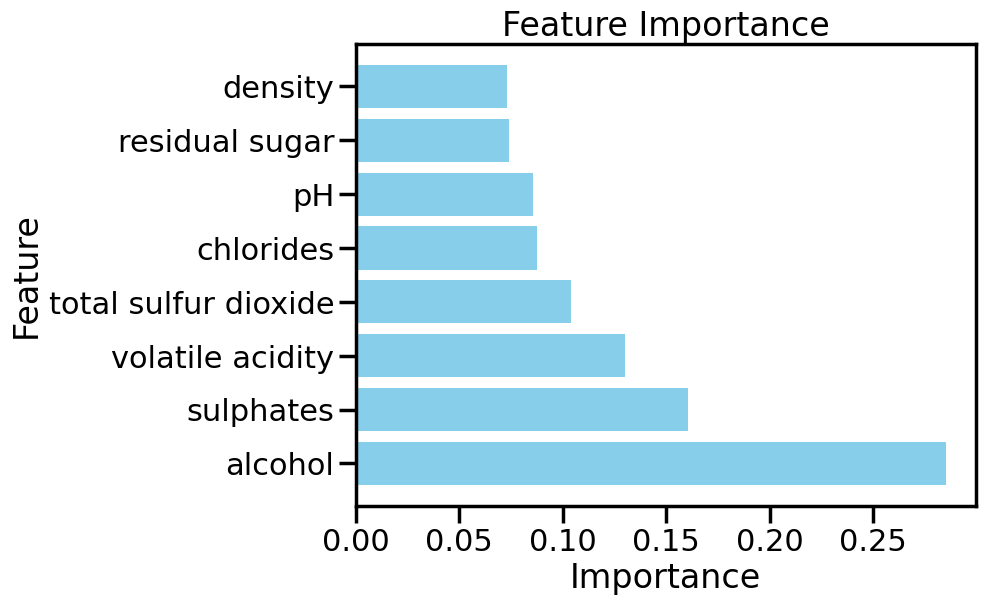

In [78]:
print("Feature Importance for Red Wine:")
red_reduced_importance = plot_feature_importance(X_red_reduced_train_second, y_red_reduced_train_second)

Feature Importance for White Wine:


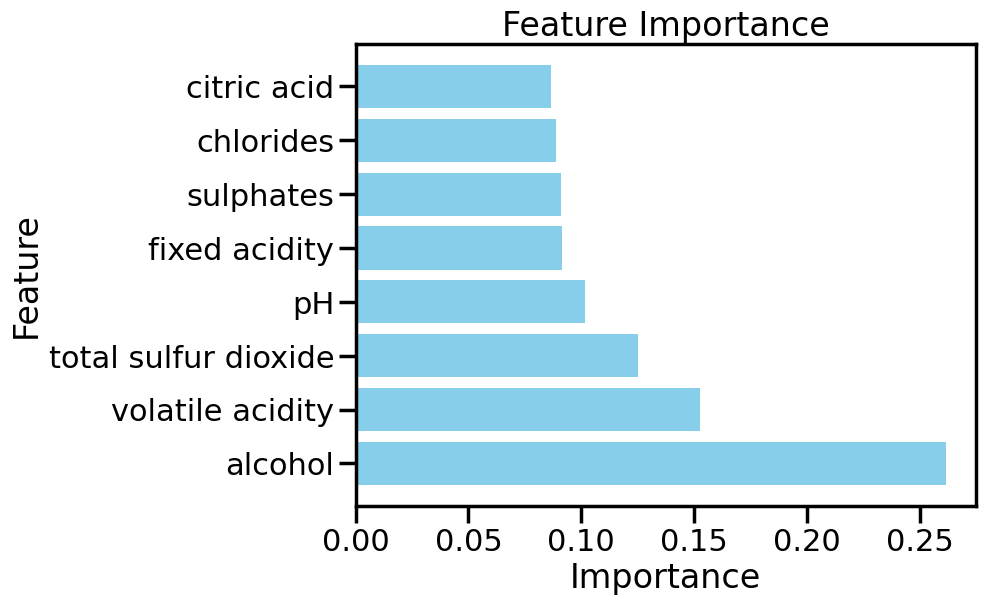

In [84]:
print("Feature Importance for White Wine:")
white_reduced_importance = plot_feature_importance(X_white_reduced_train_second, y_white_reduced_train_second)

##### Third Reduced Feature Importance Plots

Feature Importance for Red Wine:


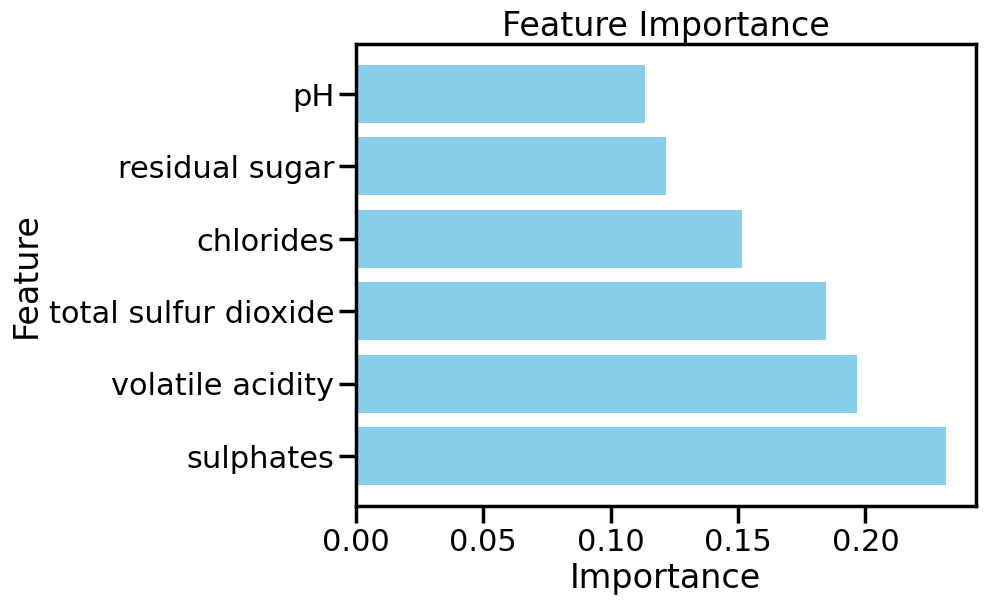

In [91]:
print("Feature Importance for Red Wine:")
red_reduced_importance = plot_feature_importance(X_red_reduced_train_third, y_red_reduced_train_third)

Feature Importance for White Wine:


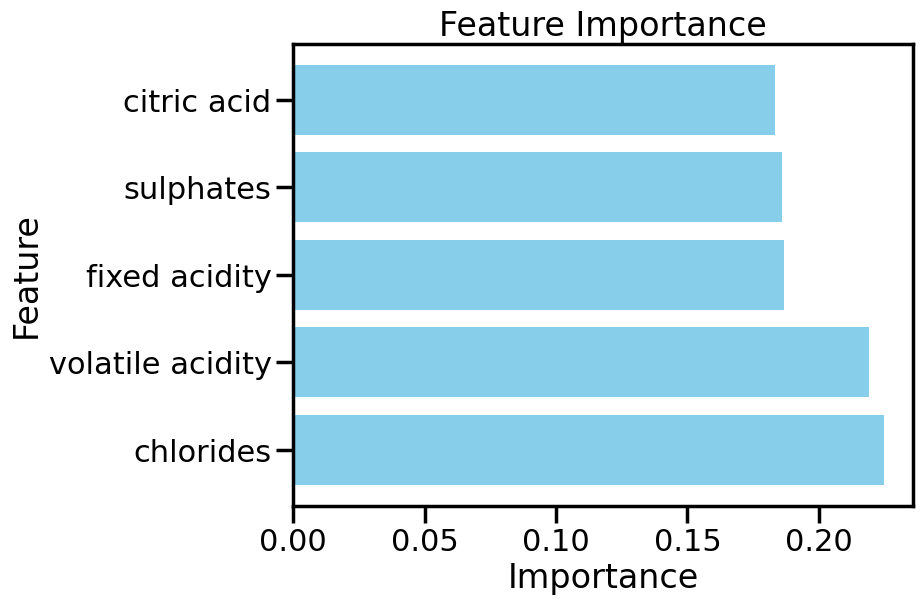

In [92]:
print("Feature Importance for White Wine:")
white_reduced_importance = plot_feature_importance(X_white_reduced_train_third, y_white_reduced_train_third)

## 2. Modeling

### 2.1 Full Feature Modeling

#### 2.1.1 Red Wine

In [25]:
rf_red_full = train_and_evaluate_model(X_red_train, X_red_test, y_red_train, y_red_test)

Model Performance:
Training RMSE: 0.22, Test RMSE: 0.55
Training R^2: 0.93, Test R^2: 0.54


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 2.1.2 White Wine

In [85]:
rf_white_full = train_and_evaluate_model(X_white_train, X_white_test, y_white_train, y_white_test)

Model Performance:
Training RMSE: 0.23, Test RMSE: 0.59
Training R^2: 0.93, Test R^2: 0.55


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 2.2 High Correlation Reduced Feature Modeling

#### 2.2.1 Red Wine

In [27]:
rf_red_reduced = train_and_evaluate_model(X_red_reduced_train, X_red_reduced_test, y_red_reduced_train, y_red_reduced_test)

Model Performance:
Training RMSE: 0.22, Test RMSE: 0.56
Training R^2: 0.93, Test R^2: 0.53


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 2.2.2 White Wine

In [86]:
rf_white_reduced = train_and_evaluate_model(X_white_reduced_train, X_white_reduced_test, y_white_reduced_train, y_white_reduced_test)


Model Performance:
Training RMSE: 0.23, Test RMSE: 0.59
Training R^2: 0.93, Test R^2: 0.55


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 2.2.3 Final Model

In [100]:

final_model_red = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

final_model_white = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

final_model_red.fit(X_red_reduced_train, y_red_reduced_train)
final_model_white.fit(X_white_reduced_train, y_white_reduced_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                      random_state=42)

In [101]:

y_train_pred = final_model_red.predict(X_red_reduced_train)
y_test_pred = final_model_red.predict(X_red_reduced_test)

# Calculate metrics
train_rmse = mean_squared_error(y_red_reduced_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_red_reduced_test, y_test_pred, squared=False)
train_r2 = r2_score(y_red_reduced_train, y_train_pred)
test_r2 = r2_score(y_red_reduced_test, y_test_pred)

# Print performance metrics
print(f"Training RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Training R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

Training RMSE: 0.374, Test RMSE: 0.569
Training R²: 0.785, Test R²: 0.504


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [102]:
y_train_pred = final_model_white.predict(X_white_reduced_train)
y_test_pred = final_model_white.predict(X_white_reduced_test)

# Calculate metrics
train_rmse = mean_squared_error(y_white_reduced_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_white_reduced_test, y_test_pred, squared=False)
train_r2 = r2_score(y_white_reduced_train, y_train_pred)
test_r2 = r2_score(y_white_reduced_test, y_test_pred)

# Print performance metrics
print(f"Training RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Training R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

Training RMSE: 0.497, Test RMSE: 0.648
Training R²: 0.686, Test R²: 0.457


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 2.3 Second Reduction Modeling

#### 2.3.1 Red Wine

In [80]:
rf_red_reduced_second = train_and_evaluate_model(X_red_reduced_train_second, X_red_reduced_test_second, y_red_reduced_train_second, y_red_reduced_test_second)

Model Performance:
Training RMSE: 0.22, Test RMSE: 0.56
Training R^2: 0.93, Test R^2: 0.52


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 2.3.2 White Wine

In [87]:
rf_white_reduced_second = train_and_evaluate_model(X_white_reduced_train_second, X_white_reduced_test_second, y_white_reduced_train_second, y_white_reduced_test_second)


Model Performance:
Training RMSE: 0.24, Test RMSE: 0.61
Training R^2: 0.93, Test R^2: 0.52


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 2.4 Third Reduction Modeling

#### 2.3.1 Red Wine

In [93]:
rf_red_reduced_third = train_and_evaluate_model(X_red_reduced_train_third, X_red_reduced_test_third, y_red_reduced_train_third, y_red_reduced_test_third)

Model Performance:
Training RMSE: 0.24, Test RMSE: 0.62
Training R^2: 0.92, Test R^2: 0.42


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 2.3.2 White Wine

In [94]:
rf_white_reduced_third = train_and_evaluate_model(X_white_reduced_train_third, X_white_reduced_test_third, y_white_reduced_train_third, y_white_reduced_test_third)

Model Performance:
Training RMSE: 0.27, Test RMSE: 0.69
Training R^2: 0.91, Test R^2: 0.38


/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/cdcoonce/Documents/GitHub/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 3. Model Analysis

### 3.1 Full Feature Residual Plot Red

In [36]:
red_train_residuals = y_red_train - rf_red_full.predict(X_red_train)
red_test_residuals =  y_red_test - rf_red_full.predict(X_red_test)

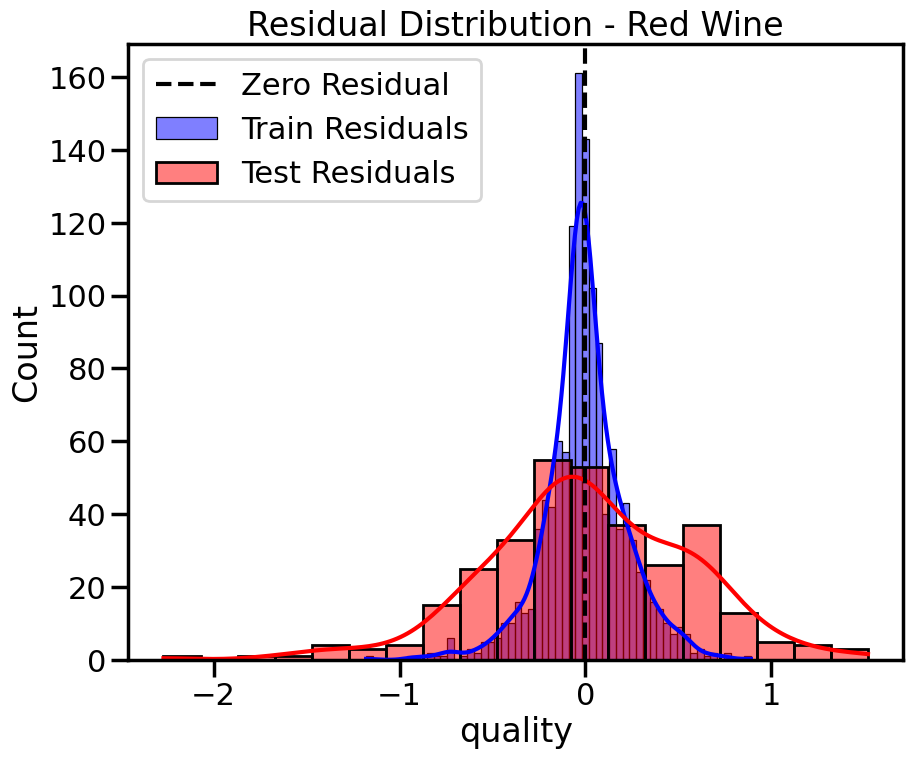

In [37]:
plt.figure(figsize=(10, 8))
sns.histplot(red_train_residuals, kde=True, color="blue", label="Train Residuals")
sns.histplot(red_test_residuals, kde=True, color="red", label="Test Residuals")
plt.axvline(0, color="black", linestyle="--", label="Zero Residual")
plt.title("Residual Distribution - Red Wine")
plt.legend()
plt.show()

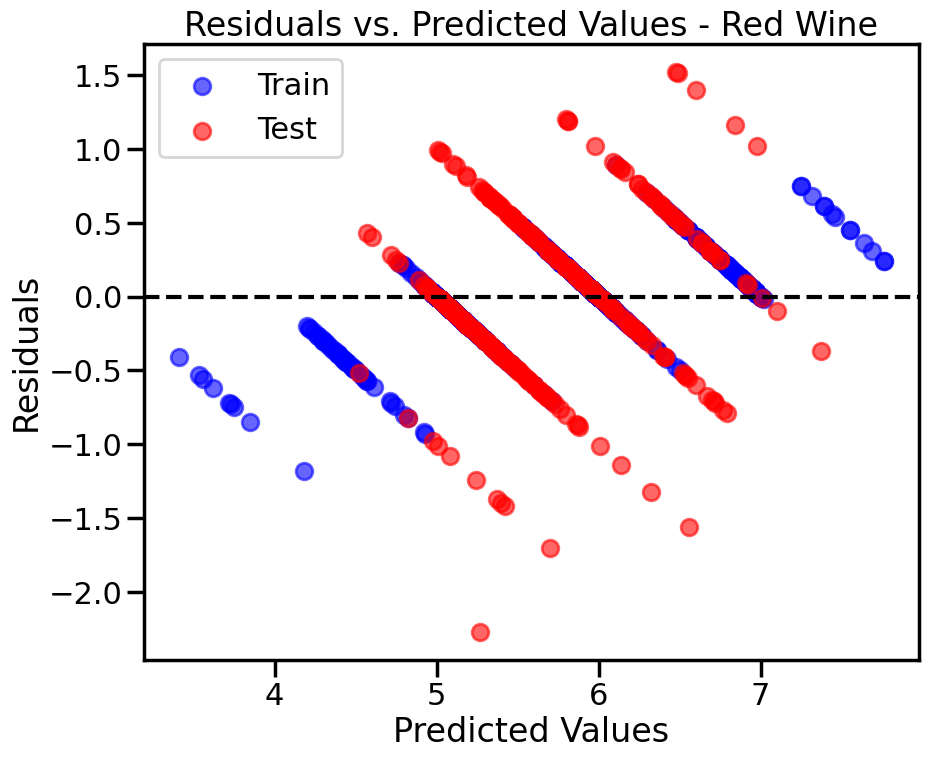

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(rf_red_full.predict(X_red_train), red_train_residuals, alpha=0.6, color="blue", label="Train")
plt.scatter(rf_red_full.predict(X_red_test), red_test_residuals, alpha=0.6, color="red", label="Test")
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuals vs. Predicted Values - Red Wine")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### 3.2 Full Feature Residual Plot White

In [41]:
white_train_residuals = y_white_train - rf_white_full.predict(X_white_train)
white_test_residuals =  y_white_test - rf_white_full.predict(X_white_test)

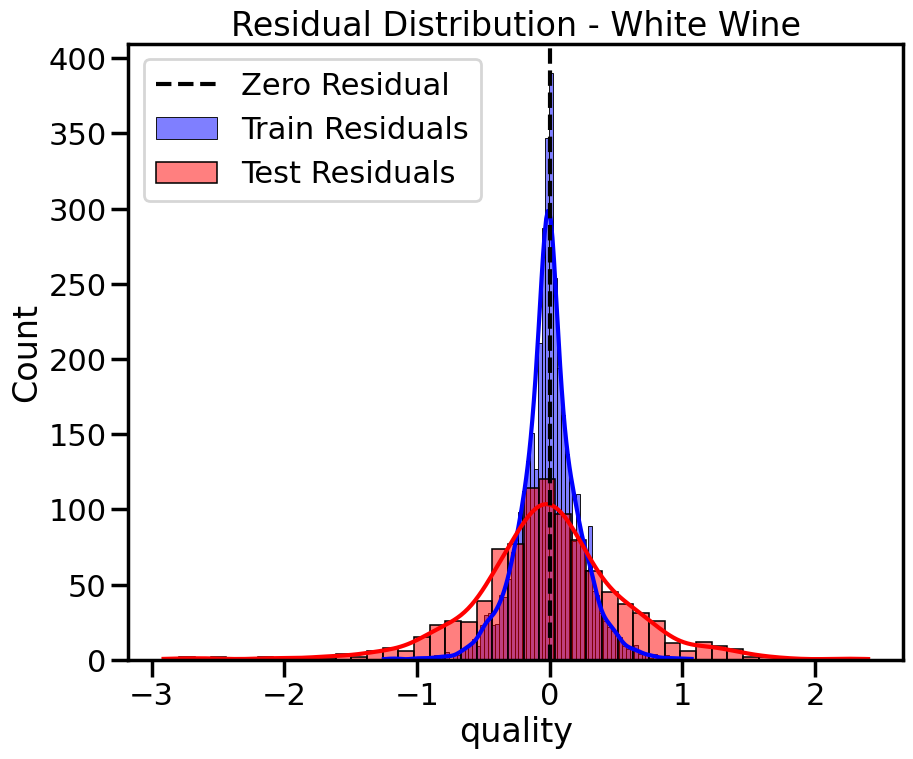

In [42]:
plt.figure(figsize=(10, 8))
sns.histplot(white_train_residuals, kde=True, color="blue", label="Train Residuals")
sns.histplot(white_test_residuals, kde=True, color="red", label="Test Residuals")
plt.axvline(0, color="black", linestyle="--", label="Zero Residual")
plt.title("Residual Distribution - White Wine")
plt.legend()
plt.show()

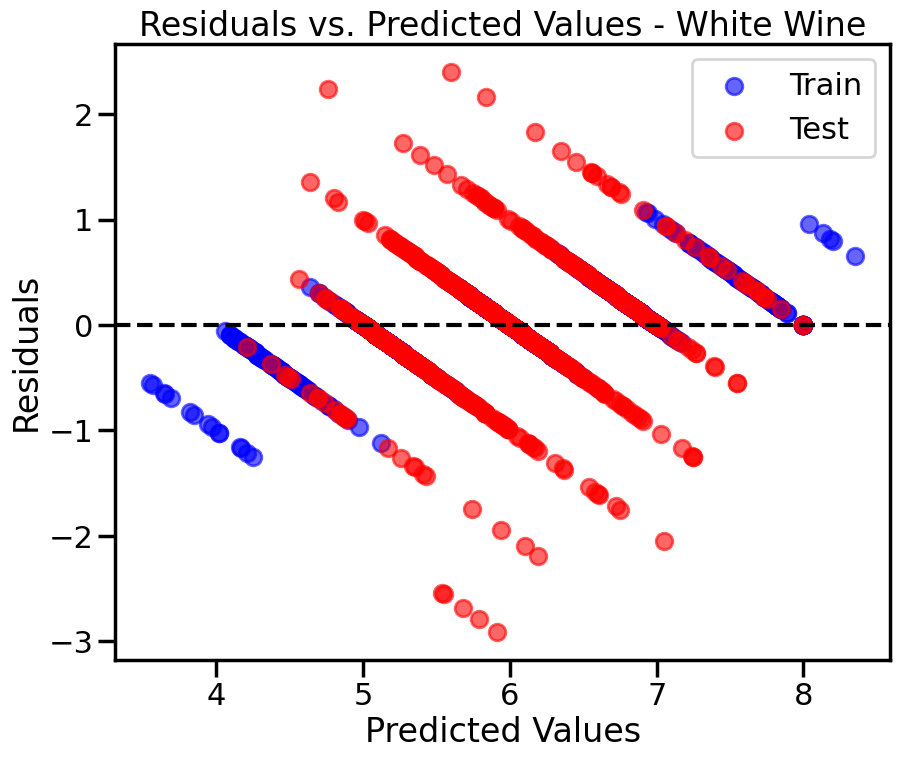

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(rf_white_full.predict(X_white_train), white_train_residuals, alpha=0.6, color="blue", label="Train")
plt.scatter(rf_white_full.predict(X_white_test), white_test_residuals, alpha=0.6, color="red", label="Test")
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuals vs. Predicted Values - White Wine")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### 3.3 Reduced Feature Residual Plot Red

In [ ]:
red_reduced_train_residuals = y_red_reduced_train - final_model_red.predict(X_red_reduced_train)
red_reduced_test_residuals =  y_red_reduced_test - final_model_red.predict(X_red_reduced_test)

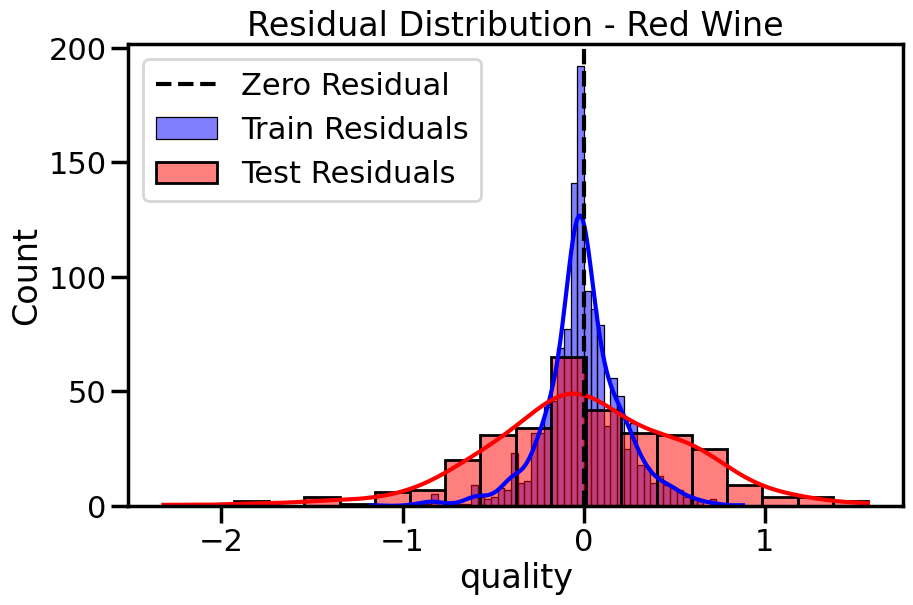

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(red_reduced_train_residuals, kde=True, color="blue", label="Train Residuals")
sns.histplot(red_reduced_test_residuals, kde=True, color="red", label="Test Residuals")
plt.axvline(0, color="black", linestyle="--", label="Zero Residual")
plt.title("Residual Distribution - Red Wine")
plt.legend()
plt.show()

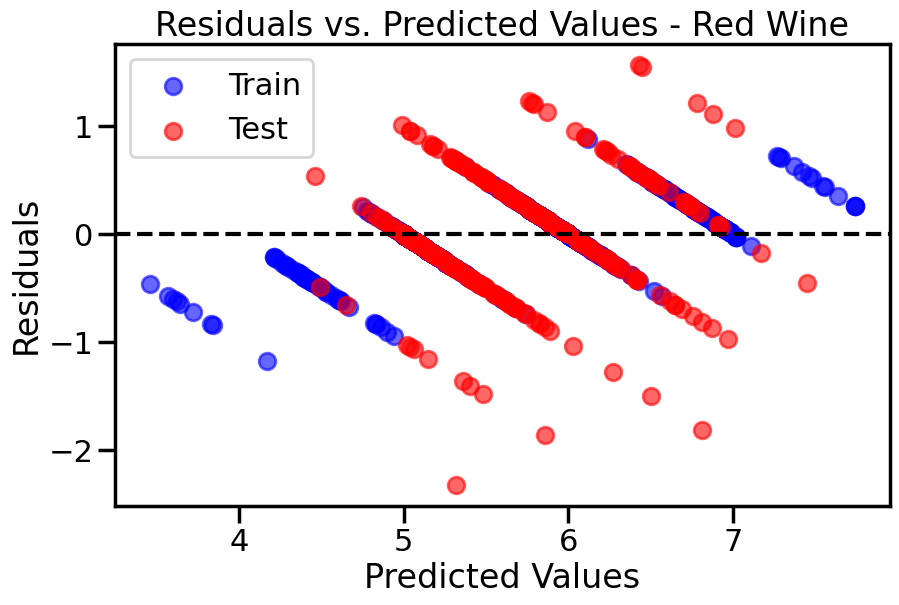

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(final_model_red.predict(X_red_reduced_train), red_reduced_train_residuals, alpha=0.6, color="blue", label="Train")
plt.scatter(final_model_red.predict(X_red_reduced_test), red_reduced_test_residuals, alpha=0.6, color="red", label="Test")
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuals vs. Predicted Values - Red Wine")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### 3.4 Reduced Feature Residual Plot White

In [96]:
white_reduced_train_residuals = y_white_reduced_train - final_model_white.predict(X_white_reduced_train)
white_reduced_test_residuals =  y_white_reduced_test - final_model_white.predict(X_white_reduced_test)

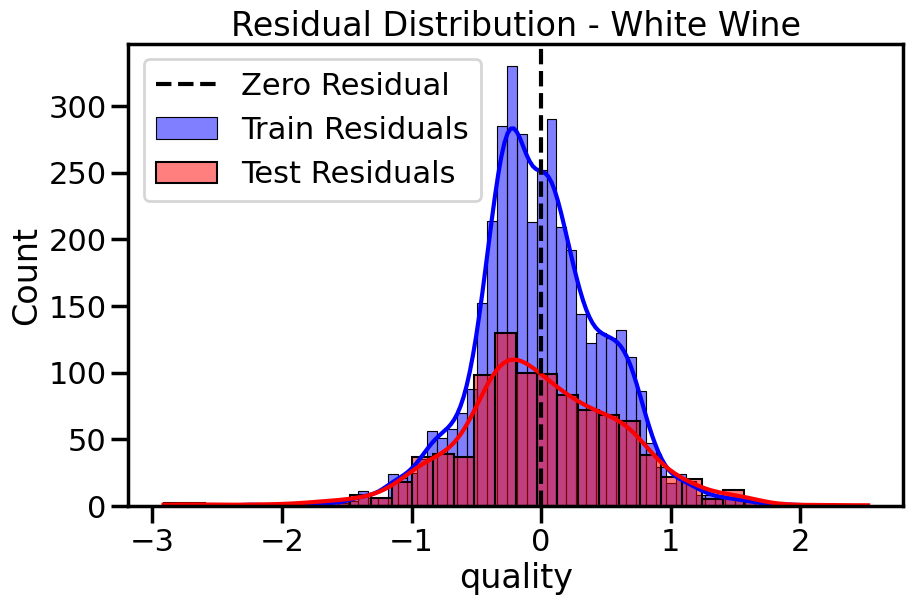

In [97]:

plt.figure(figsize=(10, 6))
sns.histplot(white_reduced_train_residuals, kde=True, color="blue", label="Train Residuals")
sns.histplot(white_reduced_test_residuals, kde=True, color="red", label="Test Residuals")
plt.axvline(0, color="black", linestyle="--", label="Zero Residual")
plt.title("Residual Distribution - White Wine")
plt.legend()
plt.show()

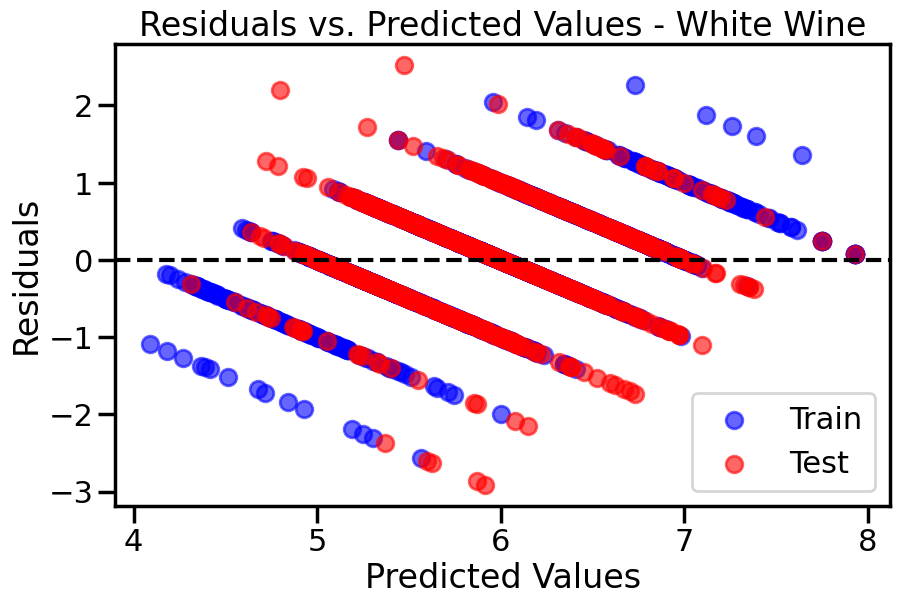

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(final_model_white.predict(X_white_reduced_train), white_reduced_train_residuals, alpha=0.6, color="blue", label="Train")
plt.scatter(final_model_white.predict(X_white_reduced_test), white_reduced_test_residuals, alpha=0.6, color="red", label="Test")
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuals vs. Predicted Values - White Wine")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### 3.5 Outlier Analysis - Reduced Features

#### Red Wine

In [52]:
red_reduced_train_outliers = identify_outliers(red_reduced_train_residuals, y_red_reduced_train)
red_reduced_test_outliers = identify_outliers(red_reduced_test_residuals, y_red_reduced_test)

In [53]:
print("Red Wine - Train Outliers:")
print(red_reduced_train_outliers)
print("\nRed Wine - Test Outliers:")
print(red_reduced_test_outliers)

Red Wine - Train Outliers:
    Residuals  True_Value
0       -0.83           4
1       -0.82           4
2       -0.46           5
3        0.46           7
4        0.55           7
..        ...         ...
72      -0.62           4
73       0.54           8
74      -0.64           3
75      -0.53           4
76      -0.84           3

[77 rows x 2 columns]

Red Wine - Test Outliers:
    Residuals  True_Value
0       -1.27           5
1       -2.32           3
2        1.21           7
3        1.12           8
4       -1.36           4
5       -1.15           4
6        1.22           8
7       -1.48           4
8        1.57           8
9       -1.50           5
10       1.55           8
11      -1.81           5
12      -1.86           4
13       1.13           7
14       1.22           7
15       1.24           7
16      -1.40           4


In [54]:
red_data = reduced_red_wine.loc[red_reduced_train_outliers.index]
red_data.describe()
red_reduced_train_outliers.describe()

Residuals  True_Value
count  77.000000   77.000000
mean   -0.050909    5.558442
std     0.611306    1.650307
min    -1.170000    3.000000
25%    -0.600000    4.000000
50%    -0.450000    6.000000
75%     0.520000    7.000000
max     0.880000    8.000000

Text(0.5, 1.0, 'Red Wine')

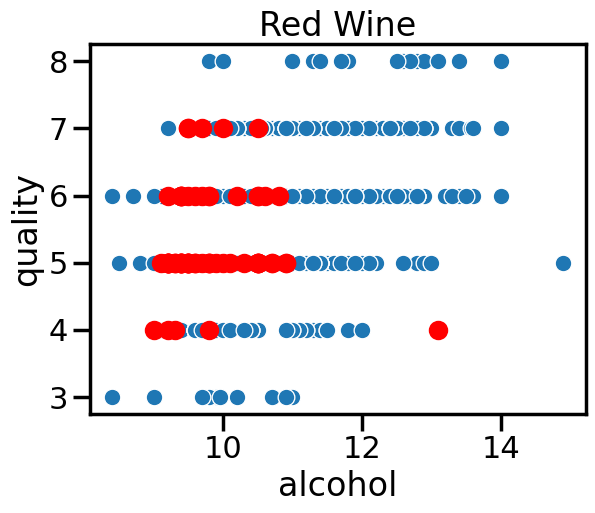

In [55]:
sns.scatterplot(data=reduced_red_wine, x="alcohol", y="quality")
plt.scatter(red_data["alcohol"], red_data["quality"], color='red')
plt.title("Red Wine")

Text(0.5, 1.0, 'Red Wine')

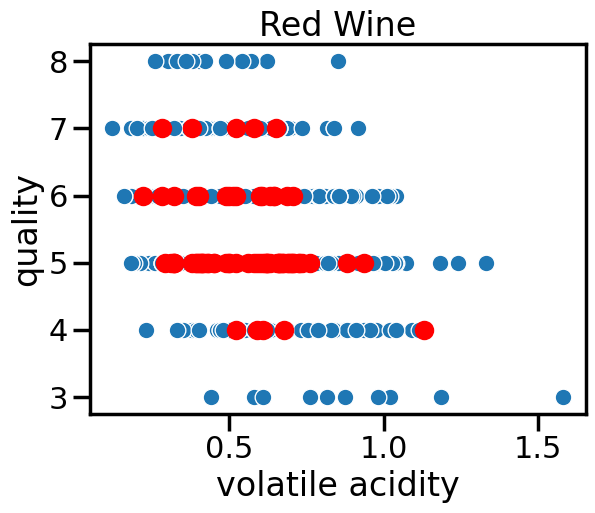

In [56]:
sns.scatterplot(data=reduced_red_wine, x="volatile acidity", y="quality")
plt.scatter(red_data["volatile acidity"], red_data["quality"], color='red')
plt.title("Red Wine")

Text(0.5, 1.0, 'Red Wine')

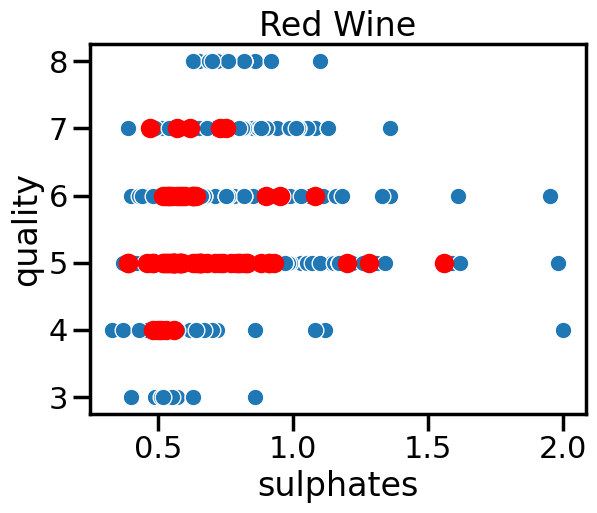

In [57]:
sns.scatterplot(data=reduced_red_wine, x="sulphates", y="quality")
plt.scatter(red_data["sulphates"], red_data["quality"], color='red')
plt.title("Red Wine")

#### White Wine

In [58]:
white_reduced_train_outliers = identify_outliers(white_reduced_train_residuals, y_white_reduced_train)
white_reduced_test_outliers = identify_outliers(white_reduced_test_residuals, y_white_reduced_test)

In [63]:
print("\nWhite Wine - Train Outliers:")
print(white_reduced_train_outliers)
print("\nWhite Wine - Test Outliers:")
print(white_reduced_test_outliers)


White Wine - Train Outliers:
     Residuals  True_Value
0        -0.92           3
1        -0.65           4
2        -0.51           5
3         0.54           7
4        -0.52           4
..         ...         ...
233      -0.71           5
234      -0.49           4
235      -0.79           4
236      -0.51           5
237       0.95           8

[238 rows x 2 columns]

White Wine - Test Outliers:
    Residuals  True_Value
0        1.57           8
1       -1.25           4
2       -1.59           5
3        1.66           8
4       -1.48           4
5        1.55           7
6        1.26           7
7        1.54           8
8       -1.61           5
9       -1.23           5
10      -1.42           5
11       1.24           8
12       1.78           7
13      -1.40           4
14      -2.57           3
15      -1.37           4
16      -1.87           4
17      -2.17           4
18       1.57           7
19      -2.88           3
20      -1.44           4
21       1.31        

In [62]:

white_data = reduced_white_wine.loc[white_reduced_train_outliers.index]
white_data.describe()
white_reduced_train_outliers.describe()

Residuals  True_Value
count  238.000000  238.000000
mean    -0.036765    5.848739
std      0.639823    1.762903
min     -1.290000    3.000000
25%     -0.570000    4.000000
50%     -0.470000    5.000000
75%      0.547500    8.000000
max      1.330000    9.000000

Text(0.5, 1.0, 'White Wine')

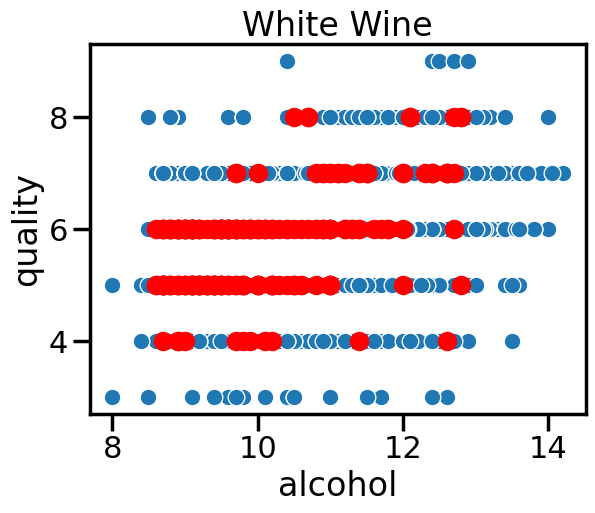

In [64]:
sns.scatterplot(data=reduced_white_wine, x="alcohol", y="quality")
plt.scatter(white_data["alcohol"], white_data["quality"], color='red')
plt.title("White Wine")

Text(0.5, 1.0, 'White Wine')

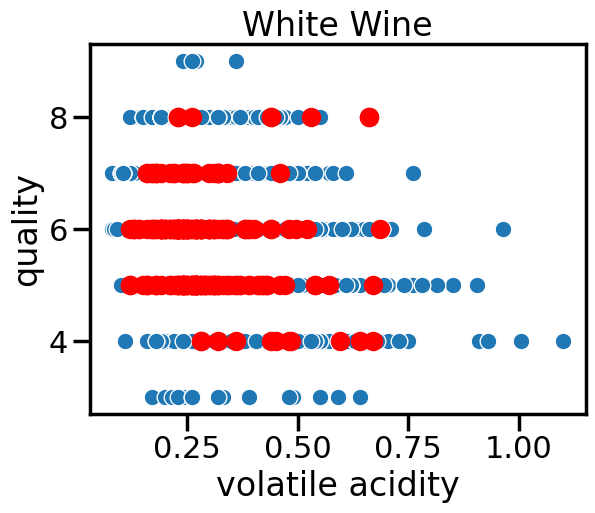

In [65]:
sns.scatterplot(data=reduced_white_wine, x="volatile acidity", y="quality")
plt.scatter(white_data["volatile acidity"], white_data["quality"], color='red')
plt.title("White Wine")

Text(0.5, 1.0, 'White Wine')

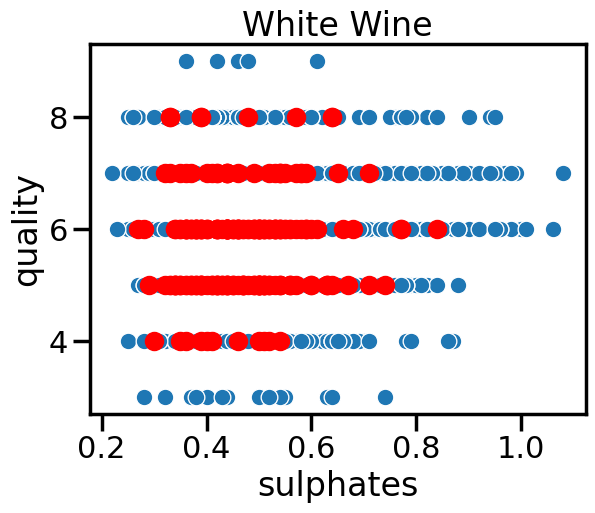

In [66]:
sns.scatterplot(data=reduced_white_wine, x="sulphates", y="quality")
plt.scatter(white_data["sulphates"], white_data["quality"], color='red')
plt.title("White Wine")